In [1]:
import pandas as pd
import numpy as np
from IPython.display import Math #para escrever equações 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import seaborn as sns

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [3]:
from random import randint
from xmlrpc.client import Boolean
from tqdm import tqdm
import pandas as pd
import numpy as np
import quantecon as qe

import logging
log = logging.getLogger(__name__)
# logging.basicConfig(level=logging.DEBUG) 


In [124]:
RANDOM_SIZE   = 1000000
RANDOM_SIZE   = 200
QTD_BINS      = 3
TEST_SIZE     = 0.05
RANDOM_STATE  = 2022
PREDITOR      = ['vegetable-oil_price', 'vegetable-oil_production', 'vegetable-oil_exports']
PREDITOR_DIRECTIONS      = ['vegetable-oil_price', 'vegetable-oil_production', 'vegetable-oil_exports']

- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_commodity_types.csv
- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_vegetable_oil.csv
- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_full.csv

# Mercado de Oleo

## Dataset Completo
USDA por comodity
USDA Agrupado por Oleo Vegetal
OECD Agrupado
FAO Index Price


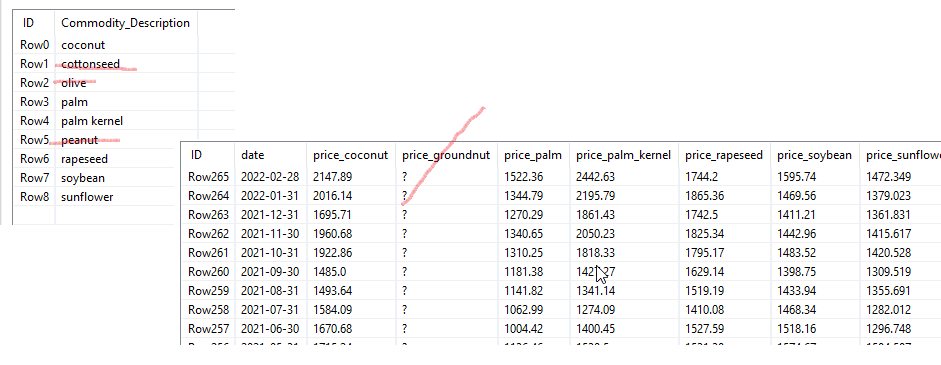

In [106]:

def get_dataset():
    df = pd.read_csv('https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_full.csv')
    print(df.shape)
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by=['date'], ascending=[True], inplace=True)
    df.set_index(['date'], inplace=True)
    return df

%time df_full = get_dataset()
df_full.head()

(266, 139)
CPU times: total: 78.1 ms
Wall time: 539 ms


,reference,coconut_beginning-stocks,coconut_crush,coconut_domestic-consumption,coconut_ending-stocks,coconut_exports,coconut_feed-waste-dom-cons,coconut_food-use-dom-cons,coconut_imports,coconut_industrial-dom-cons,...,vegetable-oil_total-supply,vegetable-oil_oecd_consumption,vegetable-oil_oecd_ending-stocks,vegetable-oil_oecd_exports,vegetable-oil_oecd_food,vegetable-oil_oecd_food-fat-availability,vegetable-oil_oecd_human-consumption-per-capita,vegetable-oil_oecd_imports,vegetable-oil_oecd_other-use,vegetable-oil_oecd_production
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7273.770,844.920,2541.320,6179.990,2.240,1.020,2490.870,1088.770,7469.760
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7298.970,849.930,2562.660,6190.320,2.240,1.020,2504.980,1098.620,7494.420
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7324.160,854.950,2584.010,6200.660,2.240,1.020,2519.100,1108.460,7519.090
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7349.360,859.960,2605.360,6211.000,2.240,1.030,2533.210,1118.310,7543.750
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7374.550,864.970,2626.710,6221.340,2.250,1.030,2547.320,1128.150,7568.420


In [107]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2000-01-31 to 2022-02-28
Columns: 138 entries, reference to vegetable-oil_oecd_production
dtypes: float64(137), object(1)
memory usage: 288.9+ KB


In [108]:
df_full.dtypes

reference                                           object
coconut_beginning-stocks                           float64
coconut_crush                                      float64
coconut_domestic-consumption                       float64
coconut_ending-stocks                              float64
                                                    ...   
vegetable-oil_oecd_food-fat-availability           float64
vegetable-oil_oecd_human-consumption-per-capita    float64
vegetable-oil_oecd_imports                         float64
vegetable-oil_oecd_other-use                       float64
vegetable-oil_oecd_production                      float64
Length: 138, dtype: object

In [109]:
features = [x for x in df_full.columns if ('exports' in x or 'production' in x or 'price' in x) and not ('olive' in x or 'cottonseed' in x) ]
prices = [x for x in df_full.columns if 'price' in x and 'groundnut' not in x  ]
print(len(features), features)
print(len(prices), prices)

26 ['coconut_exports', 'coconut_price', 'coconut_production', 'palm-kernel_exports', 'palm-kernel_price', 'palm-kernel_production', 'palm_exports', 'palm_price', 'palm_production', 'peanut_exports', 'peanut_price', 'peanut_production', 'rapeseed_exports', 'rapeseed_price', 'rapeseed_production', 'soybean_exports', 'soybean_price', 'soybean_production', 'sunflower_exports', 'sunflower_price', 'sunflower_production', 'vegetable-oil_exports', 'vegetable-oil_price', 'vegetable-oil_production', 'vegetable-oil_oecd_exports', 'vegetable-oil_oecd_production']
8 ['coconut_price', 'palm-kernel_price', 'palm_price', 'peanut_price', 'rapeseed_price', 'soybean_price', 'sunflower_price', 'vegetable-oil_price']


In [110]:
df = df_full[ features]
print(df.shape)
df = df[df['sunflower_production'].notnull()]
df = df[df['sunflower_price'].notnull()]
print(df.shape)
df

(266, 26)
(234, 26)


,coconut_exports,coconut_price,coconut_production,palm-kernel_exports,palm-kernel_price,palm-kernel_production,palm_exports,palm_price,palm_production,peanut_exports,...,soybean_price,soybean_production,sunflower_exports,sunflower_price,sunflower_production,vegetable-oil_exports,vegetable-oil_price,vegetable-oil_production,vegetable-oil_oecd_exports,vegetable-oil_oecd_production
date,,,,,,,,,,,,,,,,,,,,,
2002-02-28,148.440,376.000,255.940,130.470,356.000,264.710,1527.920,352.980,2146.310,17.030,...,364.920,3204.320,166.180,578.000,620.920,3312.180,47.786,8559.630,2986.310,7954.130
2002-03-31,148.040,366.000,255.830,130.830,353.240,266.520,1543.880,359.000,2162.830,16.580,...,359.210,3222.400,168.850,557.000,625.580,3339.800,47.622,8591.720,3014.280,7983.170
2002-04-30,147.640,411.000,255.720,131.190,405.000,268.330,1559.830,360.070,2179.360,16.140,...,370.860,3240.470,171.530,552.000,630.250,3367.440,48.969,8623.810,3042.260,8012.210
2002-05-31,147.240,420.000,255.610,131.560,418.300,270.150,1575.790,384.910,2195.890,15.690,...,399.890,3258.550,174.200,574.000,634.920,3395.080,51.641,8655.950,3070.240,8041.250
2002-06-30,146.830,446.000,255.500,131.920,439.000,271.960,1591.750,426.130,2212.420,15.250,...,456.810,3276.620,176.880,595.000,639.580,3422.710,55.804,8688.040,3098.220,8070.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,157.080,1493.640,290.610,276.780,1341.140,716.470,4092.220,1141.820,6229.440,35.640,...,1433.940,6354.170,988.220,1355.691,1703.690,7821.270,165.862,18894.320,7325.470,18174.560
2021-09-30,158.080,1485.000,291.080,278.380,1427.270,718.600,4103.190,1181.380,6246.960,35.020,...,1398.750,6350.750,994.670,1309.519,1717.600,7837.790,168.571,18923.870,7328.510,18207.820
2021-10-31,159.080,1922.860,291.560,279.970,1818.330,720.740,4114.150,1310.250,6264.470,34.400,...,1483.520,6347.330,1001.110,1420.528,1731.510,7854.300,184.837,18953.420,7331.560,18241.070


In [111]:
df.describe()

,coconut_exports,coconut_price,coconut_production,palm-kernel_exports,palm-kernel_price,palm-kernel_production,palm_exports,palm_price,palm_production,peanut_exports,...,soybean_price,soybean_production,sunflower_exports,sunflower_price,sunflower_production,vegetable-oil_exports,vegetable-oil_price,vegetable-oil_production,vegetable-oil_oecd_exports,vegetable-oil_oecd_production
count,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,...,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000
mean,154.793,1037.208,277.760,233.840,956.092,523.365,3226.635,763.075,4406.418,19.901,...,882.535,4857.446,563.021,966.043,1174.819,5990.575,103.046,14277.728,5545.769,13471.372
std,10.334,412.612,12.313,41.691,378.930,139.269,805.918,244.906,1262.844,6.470,...,272.357,980.073,284.888,334.951,331.668,1329.965,32.741,3166.837,1307.176,3118.232
min,123.000,366.000,248.500,130.470,353.240,264.710,1527.920,352.980,2146.310,12.830,...,359.210,3204.320,166.180,543.000,620.920,3312.180,47.622,8559.630,2986.310,7954.130
25%,148.055,702.250,270.998,219.213,655.290,399.255,2515.020,577.495,3275.315,15.468,...,719.372,4057.825,329.412,719.643,886.732,5027.562,78.436,11538.903,4463.065,10815.903
50%,154.895,953.500,275.410,245.990,878.330,530.115,3399.860,732.000,4468.605,16.805,...,832.990,4667.785,493.780,856.470,1127.385,5927.510,97.910,14325.960,5663.720,13418.630
75%,160.400,1387.287,287.767,263.450,1232.705,642.967,4014.682,886.188,5503.118,23.133,...,1016.713,5831.602,867.900,1174.505,1528.378,7278.573,121.403,17158.577,6772.868,16394.708
max,177.920,2256.000,302.500,283.170,2307.630,725.000,4325.500,1377.220,6299.500,40.580,...,1574.670,6381.500,1122.670,2045.000,1761.580,7887.340,184.837,19012.500,7349.260,18307.580


## Correlação

Paired density and scatterplot matrix

https://seaborn.pydata.org/examples/pair_grid_with_kde.html

In [112]:
if False:
    %time
    sns.set_theme(style="white")

    g = sns.PairGrid(df, diag_sharey=False)
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=2)

![Alt text](https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/images/Compare.png)

## Dendograma

In [113]:
if False:
    plt.figure(figsize=(25,10))
    dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

    plt.title('Dendrogram')

    # plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    %time plt.show()

# Markov
Observaçoes:
- Sera que o outcome deveria ser calculado em funcao do dado? Não deveria ser uma referencia Exogena? Exemplos (Open Interest da soja eu tenho). No exemplo do VIRAL... ele pega o outcome como o volume de negocios.

In [114]:
!pip install --upgrade quantecon numba tqdm --quiet

In [115]:
df.tail()

,coconut_exports,coconut_price,coconut_production,palm-kernel_exports,palm-kernel_price,palm-kernel_production,palm_exports,palm_price,palm_production,peanut_exports,...,soybean_price,soybean_production,sunflower_exports,sunflower_price,sunflower_production,vegetable-oil_exports,vegetable-oil_price,vegetable-oil_production,vegetable-oil_oecd_exports,vegetable-oil_oecd_production
date,,,,,,,,,,,,,,,,,,,,,
2021-08-31,157.080,1493.640,290.610,276.780,1341.140,716.470,4092.220,1141.820,6229.440,35.640,...,1433.940,6354.170,988.220,1355.691,1703.690,7821.270,165.862,18894.320,7325.470,18174.560
2021-09-30,158.080,1485.000,291.080,278.380,1427.270,718.600,4103.190,1181.380,6246.960,35.020,...,1398.750,6350.750,994.670,1309.519,1717.600,7837.790,168.571,18923.870,7328.510,18207.820
2021-10-31,159.080,1922.860,291.560,279.970,1818.330,720.740,4114.150,1310.250,6264.470,34.400,...,1483.520,6347.330,1001.110,1420.528,1731.510,7854.300,184.837,18953.420,7331.560,18241.070
2021-11-30,160.080,1960.680,292.030,281.570,2050.230,722.870,4125.120,1340.650,6281.990,33.780,...,1442.960,6343.920,1007.560,1415.617,1745.420,7870.820,184.555,18982.970,7334.600,18274.330
2021-12-31,161.080,1695.710,292.500,283.170,1861.430,725.000,4136.080,1270.290,6299.500,33.170,...,1411.210,6340.500,1014.000,1361.831,1759.330,7887.340,178.505,19012.500,7337.650,18307.580


## Geração do Random Sets

In [125]:
def prepare_dataset(df: pd.DataFrame):
    df = df.copy()
    for col in df.columns:
        df[f'{col}_delta']    = df[col].diff()
        df[f'{col}_outcome']  = df[col].diff(-1) * -1
        df[f'{col}_mom']      = df[col].pct_change()

    columns = sorted(list(df.columns))
    return df[columns].reset_index()


df_m = prepare_dataset(df)
df_m.tail(10).T

,224,225,226,227,228,229,230,231,232,233
date,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-31 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-31 00:00:00,2021-11-30 00:00:00,2021-12-31 00:00:00
coconut_exports,152.080,153.080,154.080,155.080,156.080,157.080,158.080,159.080,160.080,161.080
coconut_exports_delta,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
coconut_exports_mom,0.007,0.007,0.007,0.006,0.006,0.006,0.006,0.006,0.006,0.006
coconut_exports_outcome,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN
...,...,...,...,...,...,...,...,...,...,...
vegetable-oil_price_outcome,2.889,12.685,-17.195,-2.185,10.366,2.709,16.266,-0.282,-6.050,NaN
vegetable-oil_production,18746.630,18776.160,18805.710,18835.260,18864.780,18894.320,18923.870,18953.420,18982.970,19012.500
vegetable-oil_production_delta,29.550,29.530,29.550,29.550,29.520,29.540,29.550,29.550,29.550,29.530
vegetable-oil_production_mom,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [126]:
df_m.tail()

,date,coconut_exports,coconut_exports_delta,coconut_exports_mom,coconut_exports_outcome,coconut_price,coconut_price_delta,coconut_price_mom,coconut_price_outcome,coconut_production,...,vegetable-oil_oecd_production_mom,vegetable-oil_oecd_production_outcome,vegetable-oil_price,vegetable-oil_price_delta,vegetable-oil_price_mom,vegetable-oil_price_outcome,vegetable-oil_production,vegetable-oil_production_delta,vegetable-oil_production_mom,vegetable-oil_production_outcome
229,2021-08-31,157.080,1.000,0.006,1.000,1493.640,-90.450,-0.057,-8.640,290.610,...,0.002,33.260,165.862,10.366,0.067,2.709,18894.320,29.540,0.002,29.550
230,2021-09-30,158.080,1.000,0.006,1.000,1485.000,-8.640,-0.006,437.860,291.080,...,0.002,33.250,168.571,2.709,0.016,16.266,18923.870,29.550,0.002,29.550
231,2021-10-31,159.080,1.000,0.006,1.000,1922.860,437.860,0.295,37.820,291.560,...,0.002,33.260,184.837,16.266,0.096,-0.282,18953.420,29.550,0.002,29.550
232,2021-11-30,160.080,1.000,0.006,1.000,1960.680,37.820,0.020,-264.970,292.030,...,0.002,33.250,184.555,-0.282,-0.002,-6.050,18982.970,29.550,0.002,29.530
233,2021-12-31,161.080,1.000,0.006,NaN,1695.710,-264.970,-0.135,NaN,292.500,...,0.002,NaN,178.505,-6.050,-0.033,NaN,19012.500,29.530,0.002,NaN


In [133]:
df[['vegetable-oil_price', 'vegetable-oil_production', 'vegetable-oil_exports']]

for name, value in df[['vegetable-oil_price', 'vegetable-oil_production', 'vegetable-oil_exports']].iteritems():
    print(name, value.mean())

vegetable-oil_price 103.04604273504272
vegetable-oil_production 14277.728162393161
vegetable-oil_exports 5990.57517094017


In [136]:
def get_random_sets(input_dataframe: pd.DataFrame, 
                    size = 100000,
                    **kwargs):
    
    # take random sets of sequential rows 
    new_set = []

    # breakpoint()
    
    log.debug(f'AQUI:   {size}')
    for row_set in (tqdm(iterable = range(0, size), bar_format='{desc:<15}{percentage:3.0f}%|{bar:50}{r_bar}' ) ):
        
        # obtem de forma randomica uma amostra de n linhas do dataset
        # entre 3 e 18 meses
        row_quant     = randint(3, 18)
        row_start     = randint(0, len(input_dataframe) - row_quant)
        row_finish    = row_start + row_quant
        
        market_subset = input_dataframe.iloc[row_start:row_finish]

        # log.debug(f'AQUI:   {row_start} |{row_finish} | {market_subset.shape}')
        
        Close_Date    = max(market_subset['date'])
        

        if row_set%(size//5)==0:
            pass
            print(f'row_set: {row_set:<6} | row_quant: {row_quant:2} | rows: {row_start:>6}-{row_finish-1:<6} | market_subset: {str(market_subset.shape):^10} | Close_Date: {Close_Date:%m/%d/%Y}')
        
        ref = {}
        ref['Sequence_ID']  = [row_set]*len(market_subset)          # poderia ser 'row_quant' ao inves de 'len(market_subset)'
        ref['Close_Date']   = [Close_Date]*len(market_subset)
        ref['ref_date']     = market_subset['date']
        
        # Leitura dos Preditores, Tipo Media Movel
        for name, value in market_subset[PREDITOR].iteritems():
            ref[name]       = value.mean()
        
        columns_ref = {}
        
        if 'columns' in kwargs and isinstance(kwargs['columns'], list):
            for _col in kwargs['columns']:
                if _col in input_dataframe.columns:
                    columns_ref[_col] = market_subset[_col]
                    columns_ref[f'{_col}_variation'] = market_subset[_col].pct_change()
                    
                    if 'outcomes' in kwargs and isinstance(kwargs['outcomes'], list) and _col in kwargs['outcomes']:
                        columns_ref[f'{_col}_outcome'] = market_subset[_col].diff(-1) * -1
            
        
        if 'bypass' in kwargs and isinstance(kwargs['bypass'], list):
            for _col in kwargs['bypass']:
                columns_ref[_col] = market_subset[_col]
               
        # columns_ref = dict( sorted(columns_ref.items(), key=lambda x: x[0].lower()) )
        
        #merge dictionaries
        ref = {**ref, **columns_ref}
        
        new_set.append(pd.DataFrame(ref))
        
    return new_set

# get_random_sets(df_m, RANDOM_SIZE)

In [137]:
%time my_set_case1 = get_random_sets(df.reset_index(), RANDOM_SIZE,columns=features,  outcomes=features, bypass=[])

                 6%|███                                               | 12/200 [00:00<00:03, 56.67it/s]

row_set: 0      | row_quant:  5 | rows:    227-231    | market_subset:  (5, 27)   | Close_Date: 10/31/2021


                26%|█████████████                                     | 52/200 [00:00<00:02, 61.55it/s]

row_set: 40     | row_quant: 16 | rows:     51-66     | market_subset:  (16, 27)  | Close_Date: 01/31/2008


                44%|█████████████████████▊                            | 87/200 [00:01<00:01, 60.49it/s]

row_set: 80     | row_quant:  8 | rows:    152-159    | market_subset:  (8, 27)   | Close_Date: 10/31/2015


                64%|████████████████████████████████▎                 | 129/200 [00:02<00:01, 61.32it/s]

row_set: 120    | row_quant:  8 | rows:     53-60     | market_subset:  (8, 27)   | Close_Date: 07/31/2007


                86%|██████████████████████████████████████████▊       | 171/200 [00:02<00:00, 62.44it/s]

row_set: 160    | row_quant: 11 | rows:     51-61     | market_subset:  (11, 27)  | Close_Date: 08/31/2007


               100%|██████████████████████████████████████████████████| 200/200 [00:03<00:00, 60.81it/s]

CPU times: total: 3.31 s
Wall time: 3.29 s


In [138]:
def convet_collection_to_dataframe(collection):
    """
    Concatena todas as colecoes
    Remove os np.inf e np.nan, gerados pelo pc_c
    """
    df_out = pd.concat(collection)
    
    log.debug(f'Before dropping NaNs: {df_out.shape}')
    df_out.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_out = df_out.dropna(how='any') 
    log.debug(f'After dropping NaNs: {df_out.shape}')
    return df_out

In [139]:
%time df1 = convet_collection_to_dataframe(my_set_case1)
df1

CPU times: total: 31.2 ms
Wall time: 19 ms


,Sequence_ID,Close_Date,ref_date,vegetable-oil_price,vegetable-oil_production,vegetable-oil_exports,coconut_exports,coconut_exports_variation,coconut_exports_outcome,coconut_price,...,vegetable-oil_price_variation,vegetable-oil_price_outcome,vegetable-oil_production_variation,vegetable-oil_production_outcome,vegetable-oil_oecd_exports,vegetable-oil_oecd_exports_variation,vegetable-oil_oecd_exports_outcome,vegetable-oil_oecd_production,vegetable-oil_oecd_production_variation,vegetable-oil_oecd_production_outcome
146,1,2015-08-31,2014-09-30,98.551,15983.130,6867.560,161.190,0.001,0.190,1193.410,...,-0.030,1.540,0.003,53.330,6359.500,0.006,36.570,14987.440,0.004,62.330
147,1,2015-08-31,2014-10-31,100.091,16036.460,6928.300,161.380,0.001,0.180,1148.700,...,0.016,0.760,0.003,53.310,6396.070,0.006,36.560,15049.770,0.004,62.320
148,1,2015-08-31,2014-11-30,100.851,16089.770,6989.030,161.560,0.001,0.190,1191.630,...,0.008,-2.959,0.003,53.320,6432.630,0.006,36.570,15112.090,0.004,62.330
149,1,2015-08-31,2014-12-31,97.892,16143.090,7049.750,161.750,0.001,-2.520,1212.140,...,-0.029,-2.892,0.003,-9.230,6469.200,0.006,-24.600,15174.420,0.004,-17.330
150,1,2015-08-31,2015-01-31,95.000,16133.860,7021.550,159.230,-0.016,-2.520,1145.710,...,-0.030,0.180,-0.001,-9.200,6444.600,-0.004,-24.600,15157.090,-0.001,-17.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,199,2009-03-31,2008-10-31,92.214,12143.960,5151.090,129.240,-0.023,-3.120,856.000,...,-0.235,-10.184,0.003,30.650,4872.100,0.004,18.460,11477.200,0.003,33.100
76,199,2009-03-31,2008-11-30,82.030,12174.610,5152.620,126.120,-0.024,-3.120,719.000,...,-0.110,-3.480,0.003,30.640,4890.560,0.004,18.450,11510.300,0.003,33.100
77,199,2009-03-31,2008-12-31,78.550,12205.250,5154.170,123.000,-0.025,4.120,740.000,...,-0.042,4.228,0.003,71.140,4909.010,0.004,2.430,11543.400,0.003,36.930
78,199,2009-03-31,2009-01-31,82.778,12276.390,5180.640,127.120,0.033,4.130,734.000,...,0.054,-0.541,0.006,71.140,4911.440,0.000,2.420,11580.330,0.003,36.920


In [140]:
outcomes = [x for x in df1.columns if 'outcome' in x  ]
outcomes

['coconut_exports_outcome',
 'coconut_price_outcome',
 'coconut_production_outcome',
 'palm-kernel_exports_outcome',
 'palm-kernel_price_outcome',
 'palm-kernel_production_outcome',
 'palm_exports_outcome',
 'palm_price_outcome',
 'palm_production_outcome',
 'peanut_exports_outcome',
 'peanut_price_outcome',
 'peanut_production_outcome',
 'rapeseed_exports_outcome',
 'rapeseed_price_outcome',
 'rapeseed_production_outcome',
 'soybean_exports_outcome',
 'soybean_price_outcome',
 'soybean_production_outcome',
 'sunflower_exports_outcome',
 'sunflower_price_outcome',
 'sunflower_production_outcome',
 'vegetable-oil_exports_outcome',
 'vegetable-oil_price_outcome',
 'vegetable-oil_production_outcome',
 'vegetable-oil_oecd_exports_outcome',
 'vegetable-oil_oecd_production_outcome']

## Divisao em Quantis

In [141]:
get_divison = lambda size: [item / size for item in list(range(size + 1))]
get_labels = lambda size, start=0: [f'{chr( (item % 26 + start) + 65  )}{ "" if item // 26 <= 0 else item // 26 }' for item in list(range(size))]
get_full = lambda size: [ (chr(i + 65), f'{j / size} < x <= { (j+1) / size}' ) for i , j in enumerate(range(size))]
get_bins = lambda _input_array, size:  np.round(np.linspace(_input_array.min(), _input_array.max(), size + 1), 6).tolist()


def read_kwarg_list(kwargs, name, _else_conditions = None):
    if name in kwargs and isinstance(kwargs[name], list):
        return kwargs[name]
    return _else_conditions

def read_kwarg_bool(kwargs, name):
    if name in kwargs and isinstance(kwargs[name], Boolean):
        return kwargs[name]
    return False
        

In [142]:
print( get_labels(3, 10), get_labels(3)) 

['K', 'L', 'M'] ['A', 'B', 'C']


In [143]:
def quantiles_v1(df: pd.DataFrame, labels: list):
    df    = df.copy()
    ref   = ''.join(labels).lower()
    size  = len(labels)

    columns_labels = []
    for col in df.columns:
        if 'variation' in col:
            column_name         = f'{col}_qcut'
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_labels.append(column_name)

    equation = ' + '.join( [f'df["{col}"].astype(str)' for col in columns_labels] )
    df['event_pattern']  = eval(equation) 
    columns_labels.append('event_pattern')

    return df
    return df[['Sequence_ID','Close_Date'] + columns_labels]
    

In [144]:
df2 = quantiles_v1(df1, ['L','M','H'])
print(df2.shape)
df2.tail()

(1636, 108)


,Sequence_ID,Close_Date,ref_date,vegetable-oil_price,vegetable-oil_production,vegetable-oil_exports,coconut_exports,coconut_exports_variation,coconut_exports_outcome,coconut_price,...,soybean_production_variation_qcut,sunflower_exports_variation_qcut,sunflower_price_variation_qcut,sunflower_production_variation_qcut,vegetable-oil_exports_variation_qcut,vegetable-oil_price_variation_qcut,vegetable-oil_production_variation_qcut,vegetable-oil_oecd_exports_variation_qcut,vegetable-oil_oecd_production_variation_qcut,event_pattern
75,199,2009-03-31,2008-10-31,92.214,12143.960,5151.090,129.240,-0.023,-3.120,856.000,...,L,H,L,H,L,L,L,M,L,LLMMLMMLMHLLHLHLLLHLHLLLML
76,199,2009-03-31,2008-11-30,82.030,12174.610,5152.620,126.120,-0.024,-3.120,719.000,...,L,H,L,H,L,L,L,M,L,LLLMLMMLMHLMHLHLLLHLHLLLML
77,199,2009-03-31,2008-12-31,78.550,12205.250,5154.170,123.000,-0.025,4.120,740.000,...,L,H,L,H,L,L,L,M,L,LMLMHMMMMHLLHLHLLLHLHLLLML
78,199,2009-03-31,2009-01-31,82.778,12276.390,5180.640,127.120,0.033,4.130,734.000,...,H,M,H,M,M,H,H,L,M,HMHMMMMHLMLLMMHHHHMHMMHHLM
79,199,2009-03-31,2009-02-28,82.237,12347.530,5207.090,131.250,0.032,4.130,673.000,...,H,M,L,M,M,M,H,L,M,HLHMMMMMLMLLMLHHLHMLMMMHLM


In [145]:
outcomes

['coconut_exports_outcome',
 'coconut_price_outcome',
 'coconut_production_outcome',
 'palm-kernel_exports_outcome',
 'palm-kernel_price_outcome',
 'palm-kernel_production_outcome',
 'palm_exports_outcome',
 'palm_price_outcome',
 'palm_production_outcome',
 'peanut_exports_outcome',
 'peanut_price_outcome',
 'peanut_production_outcome',
 'rapeseed_exports_outcome',
 'rapeseed_price_outcome',
 'rapeseed_production_outcome',
 'soybean_exports_outcome',
 'soybean_price_outcome',
 'soybean_production_outcome',
 'sunflower_exports_outcome',
 'sunflower_price_outcome',
 'sunflower_production_outcome',
 'vegetable-oil_exports_outcome',
 'vegetable-oil_price_outcome',
 'vegetable-oil_production_outcome',
 'vegetable-oil_oecd_exports_outcome',
 'vegetable-oil_oecd_production_outcome']

## Compressing

In [146]:
def compress_v1(input_dataframe: pd.DataFrame, **kwargs):
    columns         = read_kwarg_list(kwargs,'columns')
    outcomes        = read_kwarg_list(kwargs,'outcomes')
    
    if columns and 'event_pattern' in input_dataframe.columns:
        df_step1 = input_dataframe.groupby(columns)['event_pattern'].apply(lambda x: ','.join(x)).reset_index()
        
    if columns and outcomes:
        df_step2 = input_dataframe.groupby(columns)[outcomes].mean()
        
    compressed_set = pd.merge(df_step1, df_step2, on= columns, how='inner')
    
    return compressed_set

In [149]:
df3 = compress_v1(df2, columns = ['Sequence_ID', 'Close_Date'] + PREDITOR,  outcomes = outcomes)
print(df3.shape)
df3.tail()

(1636, 32)


,Sequence_ID,Close_Date,vegetable-oil_price,vegetable-oil_production,vegetable-oil_exports,event_pattern,coconut_exports_outcome,coconut_price_outcome,coconut_production_outcome,palm-kernel_exports_outcome,...,soybean_price_outcome,soybean_production_outcome,sunflower_exports_outcome,sunflower_price_outcome,sunflower_production_outcome,vegetable-oil_exports_outcome,vegetable-oil_price_outcome,vegetable-oil_production_outcome,vegetable-oil_oecd_exports_outcome,vegetable-oil_oecd_production_outcome
1631,199,2009-03-31,78.550,12205.250,5154.170,LMLMHMMMMHLLHLHLLLHLHLLLML,4.120,-6.000,0.860,0.430,...,44.340,40.050,-0.330,58.000,1.600,26.470,4.228,71.140,2.430,36.930
1632,199,2009-03-31,82.030,12174.610,5152.620,LLLMLMMLMHLMHLHLLLHLHLLLML,-3.120,21.000,-0.370,1.410,...,-80.090,-16.850,7.090,-76.000,11.350,1.550,-3.480,30.640,18.450,33.100
1633,199,2009-03-31,82.237,12347.530,5207.090,HLHMMMMMLMLLMLHHLHMLMMMHLM,4.130,-48.000,0.860,0.420,...,-16.930,40.050,-0.340,-48.000,1.610,26.460,-0.749,71.140,2.430,36.920
1634,199,2009-03-31,82.778,12276.390,5180.640,HMHMMMMHLMLLMMHHHHMHMMHHLM,4.130,-61.000,0.860,0.420,...,-42.250,40.060,-0.330,-12.000,1.600,26.450,-0.541,71.140,2.420,36.920
1635,199,2009-03-31,92.214,12143.960,5151.090,LLMMLMMLMHLLHLHLLLHLHLLLML,-3.120,-137.000,-0.380,1.410,...,-116.890,-16.850,7.090,-115.000,11.350,1.530,-10.184,30.650,18.460,33.100


In [150]:
df3.columns

Index(['Sequence_ID', 'Close_Date', 'vegetable-oil_price',
       'vegetable-oil_production', 'vegetable-oil_exports', 'event_pattern',
       'coconut_exports_outcome', 'coconut_price_outcome',
       'coconut_production_outcome', 'palm-kernel_exports_outcome',
       'palm-kernel_price_outcome', 'palm-kernel_production_outcome',
       'palm_exports_outcome', 'palm_price_outcome', 'palm_production_outcome',
       'peanut_exports_outcome', 'peanut_price_outcome',
       'peanut_production_outcome', 'rapeseed_exports_outcome',
       'rapeseed_price_outcome', 'rapeseed_production_outcome',
       'soybean_exports_outcome', 'soybean_price_outcome',
       'soybean_production_outcome', 'sunflower_exports_outcome',
       'sunflower_price_outcome', 'sunflower_production_outcome',
       'vegetable-oil_exports_outcome', 'vegetable-oil_price_outcome',
       'vegetable-oil_production_outcome',
       'vegetable-oil_oecd_exports_outcome',
       'vegetable-oil_oecd_production_outcome'],
   

## Simplificando o Dataset
A rigor a simplificaçao ocorre antes de *Directions*, pois dá para remover dados indesejados.

In [151]:
df3[outcomes].describe()

,coconut_exports_outcome,coconut_price_outcome,coconut_production_outcome,palm-kernel_exports_outcome,palm-kernel_price_outcome,palm-kernel_production_outcome,palm_exports_outcome,palm_price_outcome,palm_production_outcome,peanut_exports_outcome,...,soybean_price_outcome,soybean_production_outcome,sunflower_exports_outcome,sunflower_price_outcome,sunflower_production_outcome,vegetable-oil_exports_outcome,vegetable-oil_price_outcome,vegetable-oil_production_outcome,vegetable-oil_oecd_exports_outcome,vegetable-oil_oecd_production_outcome
count,1636.000,1636.000,1636.000,1636.000,1636.000,1636.000,1636.000,1636.000,1636.000,1636.000,...,1636.000,1636.000,1636.000,1636.000,1636.000,1636.000,1636.000,1636.000,1636.000,1636.000
mean,0.062,9.050,0.216,0.605,6.754,1.983,11.186,4.547,18.281,0.119,...,3.707,14.240,3.435,3.895,4.456,19.354,0.542,47.031,20.118,46.829
std,1.910,90.129,1.162,1.312,93.671,1.662,16.179,49.669,14.626,0.324,...,45.632,13.349,8.089,67.278,8.373,21.799,6.022,23.707,18.452,28.520
min,-3.120,-331.000,-1.830,-2.650,-389.130,-2.120,-24.320,-249.910,-22.310,-1.530,...,-258.490,-16.860,-15.500,-373.000,-14.100,-28.240,-29.180,-9.230,-24.600,-17.340
25%,-1.830,-29.000,-0.490,-0.540,-33.910,1.100,0.790,-17.800,13.110,-0.070,...,-18.290,5.920,-2.310,-17.060,-0.250,7.378,-2.001,30.630,11.650,31.110
50%,-0.080,6.000,0.490,0.880,13.010,2.180,14.760,2.940,20.650,0.045,...,1.880,15.020,0.880,1.000,1.930,19.605,0.333,46.970,23.300,45.050
75%,1.440,58.500,0.860,1.410,46.280,3.380,22.368,26.830,25.240,0.270,...,30.210,19.280,9.330,28.830,10.680,33.560,4.106,66.470,33.260,63.370
max,4.130,323.000,2.270,2.940,309.500,9.430,79.680,146.480,82.180,1.220,...,133.970,71.850,17.910,240.000,26.270,136.430,15.540,176.590,127.930,158.470


In [152]:
# df3[[x for x in df_full.columns if 'outcome' in x and 'prices' in x  ]].describe()

In [153]:
relevant_cut_off  = 1 #variacao maior que 1 ponto 
outcome_reference = 'sunflower_price_outcome'

print(f'All available data: { df3.shape[0]}')
df4 = df3[ abs(df3[outcome_reference]) > relevant_cut_off ][:]
print(f'Relevant changes: { df4.shape[0]}')

All available data: 1636
Relevant changes: 1510


In [154]:
df4

,Sequence_ID,Close_Date,vegetable-oil_price,vegetable-oil_production,vegetable-oil_exports,event_pattern,coconut_exports_outcome,coconut_price_outcome,coconut_production_outcome,palm-kernel_exports_outcome,...,soybean_price_outcome,soybean_production_outcome,sunflower_exports_outcome,sunflower_price_outcome,sunflower_production_outcome,vegetable-oil_exports_outcome,vegetable-oil_price_outcome,vegetable-oil_production_outcome,vegetable-oil_oecd_exports_outcome,vegetable-oil_oecd_production_outcome
0,1,2015-08-31,90.429,16078.580,6852.230,LLLLLLLLLLHMLLLLLMMMMLLLLL,-2.520,-70.660,-0.370,-1.510,...,-23.990,13.170,5.080,-22.640,3.430,-28.210,-8.134,-9.220,-24.590,-17.330
1,1,2015-08-31,91.867,16106.220,6936.900,LMLLLLLLLLLMLMLLMMMHMLMLLL,-2.520,54.440,-0.380,-1.510,...,37.390,13.180,5.080,82.550,3.440,-28.220,2.623,-9.200,-24.600,-17.330
2,1,2015-08-31,92.615,16115.440,6965.100,LLLLLLLLLLLMLMLLLMMLMLLLLL,-2.520,-13.180,-0.370,-1.510,...,-2.190,13.170,5.090,28.950,3.430,-28.200,-0.748,-9.220,-24.600,-17.330
3,1,2015-08-31,94.490,16097.020,6908.680,LHLLMLLMLLLMLHLLHMMHMLHLLL,-2.530,-8.300,-0.370,-1.500,...,3.080,13.170,5.080,11.900,3.440,-28.240,1.400,-9.230,-24.590,-17.330
4,1,2015-08-31,95.000,16133.860,7021.550,LLLLMLLMLLLMLLLLLMMLMLLLLL,-2.520,14.790,-0.370,-1.510,...,-33.970,13.180,5.080,-45.710,3.440,-28.230,0.180,-9.200,-24.600,-17.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,199,2009-03-31,78.550,12205.250,5154.170,LMLMHMMMMHLLHLHLLLHLHLLLML,4.120,-6.000,0.860,0.430,...,44.340,40.050,-0.330,58.000,1.600,26.470,4.228,71.140,2.430,36.930
1632,199,2009-03-31,82.030,12174.610,5152.620,LLLMLMMLMHLMHLHLLLHLHLLLML,-3.120,21.000,-0.370,1.410,...,-80.090,-16.850,7.090,-76.000,11.350,1.550,-3.480,30.640,18.450,33.100
1633,199,2009-03-31,82.237,12347.530,5207.090,HLHMMMMMLMLLMLHHLHMLMMMHLM,4.130,-48.000,0.860,0.420,...,-16.930,40.050,-0.340,-48.000,1.610,26.460,-0.749,71.140,2.430,36.920
1634,199,2009-03-31,82.778,12276.390,5180.640,HMHMMMMHLMLLMMHHHHMHMMHHLM,4.130,-61.000,0.860,0.420,...,-42.250,40.060,-0.330,-12.000,1.600,26.450,-0.541,71.140,2.420,36.920


## Directions


In [218]:
def directions(df: pd.DataFrame):
    df    = df.copy()

    for col in [x for x in df.columns if 'outcome' in x ]:
        column_name         = f'{col}_direction'
        df[column_name]     = df[col].apply(lambda x: 1 if x > 0 else 0 )

    qtd_cols = 6
        
    columns_fixed   = list(df.columns[:qtd_cols])
    columns_sort    = sorted(list(df.columns[qtd_cols:]))
    
    return df[columns_fixed + columns_sort].sort_values(by = ['Close_Date'], ascending=[True]) \
            .reset_index().set_index(['Sequence_ID', 'Close_Date'])


In [161]:
#sem simplificacao
%time df5 = directions(df3)
df5

CPU times: total: 78.1 ms
Wall time: 40 ms


index  vegetable-oil_price  vegetable-oil_production  \
Sequence_ID Close_Date                                                         
140         2003-01-31   1128               55.804                  8688.040   
            2003-01-31   1129               59.647                  8752.250   
190         2003-03-31   1550               64.323                  8928.840   
            2003-03-31   1549               62.353                  8977.000   
            2003-03-31   1548               59.647                  8752.250   
...                       ...                  ...                       ...   
183         2021-10-31   1488              104.596                 18651.940   
            2021-10-31   1487               98.702                 18649.920   
            2021-10-31   1486               93.200                 18647.890   
            2021-10-31   1485               86.614                 18645.880   
            2021-10-31   1489              106.450                 18653.960   

                        vegetable-oil_exports               event_pattern  \
Sequence_ID Close_Date                                                      
140         2003-01-31               3422.710  MHMMHHHHHLHLLHLHHHHHHHHMHM   
            2003-01-31               3477.980  LMMMMHHHHLHLLHLHHHHHHHHHHH   
190         2003-03-31               3614.410  LHMHHHHHHLHLLHLHHHHMHHHHHH   
            2003-03-31               3640.340  MLMHLHHLHHHHHLHMLLHLHHLHMH   
            2003-03-31               3477.980  LMMMMHHHHLHLLHLHHHHHHHHHHH   
...                                       ...                         ...   
183         2021-10-31               7734.480  LHMLMLLHLHMMMMMMHLLHLLHLLL   
            2021-10-31               7749.590  LHMLHLLHLHMMMHMMHLLHLLHLLL   
            2021-10-31               7764.700  MLMLLLLHLHHMMHMMHLLHLLHLLL   
            2021-10-31               7779.780  LHMLHLLHLHHMMHMMHLLHLLHLLL   
            2021-10-31               7719.390  LHMLHLLHLHLMMMMMMLLMLLMLLL   

                        coconut_exports_outcome  \
Sequence_ID Close_Date                            
140         2003-01-31                   -0.800   
            2003-01-31                   -1.250   
190         2003-03-31                    0.360   
            2003-03-31                    0.360   
            2003-03-31                   -1.250   
...                                         ...   
183         2021-10-31                   -0.570   
            2021-10-31                   -0.580   
            2021-10-31                   -0.580   
            2021-10-31                   -0.570   
            2021-10-31                   -0.580   

                        coconut_exports_outcome_direction  \
Sequence_ID Close_Date                                      
140         2003-01-31                                  0   
            2003-01-31                                  0   
190         2003-03-31                                  1   
            2003-03-31                                  1   
            2003-03-31                                  0   
...                                                   ...   
183         2021-10-31                                  0   
            2021-10-31                                  0   
            2021-10-31                                  0   
            2021-10-31                                  0   
            2021-10-31                                  0   

                        coconut_price_outcome  \
Sequence_ID Close_Date                          
140         2003-01-31                 -3.000   
            2003-01-31                 51.000   
190         2003-03-31                -17.000   
            2003-03-31                -36.000   
            2003-03-31                 51.000   
...                                       ...   
183         2021-10-31                 84.180   
            2021-10-31                 52.880   
            2021-10-31           

## Split Train/Test

O Shuffle esta desativado. Não sera realizado embaralhamento de serie temporal, para evitar o erro de prever o passado com dados do futuro.

In [162]:
feature_directions = ['event_pattern'] + [x for x in df5.columns if 'direction' in x ]

In [164]:
X = df5[ feature_directions ]
y = df5[PREDITOR]


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=False)
print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape} ')

X_train: (1554, 27) | X_test: (82, 27) | y_train: (1554, 3) | y_test: (82, 3) 


In [166]:
X_train

event_pattern  \
Sequence_ID Close_Date                               
140         2003-01-31  MHMMHHHHHLHLLHLHHHHHHHHMHM   
            2003-01-31  LMMMMHHHHLHLLHLHHHHHHHHHHH   
190         2003-03-31  LHMHHHHHHLHLLHLHHHHMHHHHHH   
            2003-03-31  MLMHLHHLHHHHHLHMLLHLHHLHMH   
            2003-03-31  LMMMMHHHHLHLLHLHHHHHHHHHHH   
...                                            ...   
188         2020-07-31  LLLLLLLLLMLHMHMHMMHMMLMLLL   
            2020-07-31  LMLLLLLHLMMHMMMHLMHMMLMLLL   
            2020-07-31  LHLLHLLHLMLHMLMHMMMMMLHLLL   
            2020-07-31  LHLLHLLHLMHHMHMHHMHHMLHLLL   
            2020-07-31  LHMLHLLHLHHMMHMMHLLHLLHLLL   

                        coconut_exports_outcome_direction  \
Sequence_ID Close_Date                                      
140         2003-01-31                                  0   
            2003-01-31                                  0   
190         2003-03-31                                  1   
            2003-03-31                                  1   
            2003-03-31                                  0   
...                                                   ...   
188         2020-07-31                                  0   
            2020-07-31                                  0   
            2020-07-31                                  0   
            2020-07-31                                  0   
            2020-07-31                                  0   

                        coconut_price_outcome_direction  \
Sequence_ID Close_Date                                    
140         2003-01-31                                0   
            2003-01-31                                1   
190         2003-03-31                                0   
            2003-03-31                                0   
            2003-03-31                                1   
...                                                 ...   
188         2020-07-31                                1   
            2020-07-31                                0   
            2020-07-31                                1   
            2020-07-31                                1   
            2020-07-31                                0   

                        coconut_production_outcome_direction  \
Sequence_ID Close_Date                                         
140         2003-01-31                                     0   
            2003-01-31                                     1   
190         2003-03-31                                     1   
            2003-03-31                                     1   
            2003-03-31                                     1   
...                                                      ...   
188         2020-07-31                                     0   
            2020-07-31                                     0   
            2020-07-31                                     0   
            2020-07-31                                     0   
            2020-07-31                                     0   

                        palm-kernel_exports_outcome_direction  \
Sequence_ID Close_Date                                          
140         2003-01-31                                      1   
            2003-01-31                                      1   
190         2003-03-31                                      1   
            2003-03-31                                      1   
            2003-03-31                                      1   
...                                                       ...   
188         2020-07-31                                      0   
            2020-07-31                                      0   
            2020-07-31                                      0   
            2020-07-31                                      0   
            2020-07-31                                      0   

                        palm-kernel_price_outcome_direction  \
Sequence_ID Close_Date        

In [168]:
print(X_train.shape, "Metade de linhas:", X_train.shape[0]/2)
print('=='*80)
print('Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. ')
print('=='*80)

X_train[[x for x in df5.columns if 'direction' in x ]].sum()

(1554, 27) Metade de linhas: 777.0
Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. 


coconut_exports_outcome_direction                   767
coconut_price_outcome_direction                     849
coconut_production_outcome_direction                878
palm-kernel_exports_outcome_direction              1137
palm-kernel_price_outcome_direction                 906
palm-kernel_production_outcome_direction           1385
palm_exports_outcome_direction                     1284
palm_price_outcome_direction                        813
palm_production_outcome_direction                  1406
peanut_exports_outcome_direction                    797
peanut_price_outcome_direction                      787
peanut_production_outcome_direction                 944
rapeseed_exports_outcome_direction                 1221
rapeseed_price_outcome_direction                    830
rapeseed_production_outcome_direction              1263
soybean_exports_outcome_direction                   819
soybean_price_outcome_direction                     809
soybean_production_outcome_direction            

In [169]:
direction_reference = 'sunflower_production_outcome_direction'
df6_pos_case1 = X_train.loc[X_train[direction_reference] > 0]
df6_neg_case1 = X_train.loc[X_train[direction_reference] <= 0]
print(f'df6_pos: {df6_pos_case1.shape} | df6_neg: {df6_neg_case1.shape}')

df6_pos: (1188, 27) | df6_neg: (366, 27)


## Unique Patterns

In [170]:
X_train_case1 = X_train.copy()

In [171]:
def get_unique_patterns_V1(input_array: np.ndarray, **kwargs):
    """ 
    Aqui o 'get_labels' nao deve fazer parte... pois os unique patterns pode estar agrupado. Ex. AAA, ABC, etc
    """
    flat_list = [ item.split(',') for item in input_array ]
    unique_patterns = ','.join(str(r) for v in flat_list for r in v)
    unique_patterns = sorted(list( set( unique_patterns.split(',') ) ))
    return unique_patterns

In [172]:
# flat_list = [ item.split(',') for item in X_train['event_pattern'].values ]
# unique_patterns = ','.join(str(r) for v in flat_list for r in v)
# unique_patterns = sorted(list( set( unique_patterns.split(',') ) ))
# unique_patterns

In [173]:
unique_patterns = get_unique_patterns_V1(X_train_case1['event_pattern'].values)
print(len(unique_patterns), unique_patterns[:3])

208 ['HHHHHHHHHLLLLHHHHHLHLHHHHH', 'HHHHHHHHHLLLLLHHMHLLLHMHHH', 'HHHHHHHMHLLLLLHHLHLLLHMHHH']


## Matriz de Markov

Matriz estocastica
- cada elemento da matriz é positivo
- a somatoria de cada linha é 1

In [174]:
def build_transition_grid_v1(input_dataframe: pd.DataFrame, unique_patterns):
    # log.debug(f'unique_patterns ==> {unique_patterns}')
    
    # build the markov transition grid

    patterns = []
    counts = []
    counts_fk = {}
    
    # de
    for from_event in unique_patterns:
        # para
        
        for to_event in unique_patterns:
            
            pattern = from_event + ',' + to_event # MMM,MlM
            

            ids_matches = input_dataframe[input_dataframe['event_pattern'].str.contains(pattern)]
            
            
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['event_pattern'].values)
                found = Event_Pattern.count(pattern)
                
#             log.debug(f'pattern => {pattern} | ids_matches: {len(ids_matches)} | found: {found} ')
            patterns.append(pattern)
            counts.append(found)
            
            counts_fk[pattern] = f'{len(ids_matches)}|{found}'
    
    # log.debug(f'patterns: {patterns}')
    # log.debug(f'counts: {counts}')
    # log.debug(counts_fk)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})
    
    # return grid_Df

    ## Warning
    # grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',').str
    
    grid_Df[['x', 'y']] = grid_Df['pairs'].str.split(',', n=1, expand=True)
    
    # return grid_Df

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')
    
    # return grid_Df

    # log.debug(f'Antes Columns :{grid_Df.columns}')
    grid_Df.columns= [col for col in grid_Df.columns]
    # log.debug(f'Depois Columns :{grid_Df.columns}')
    
    # return grid_Df
   

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    
    grid_Df['soma'] = grid_Df.sum(axis=1)
    
    # return grid_Df

    # grid_Df.rowSums(transition_dataframe) 
    # grid_Df = grid_Df / grid_Df['soma']
    
    for col in grid_Df.columns:
        grid_Df[col] = grid_Df[col]/grid_Df['soma']
        
        
    del grid_Df['soma']

    return grid_Df

In [175]:
%time grid_pos = build_transition_grid_v1(df6_pos_case1, unique_patterns) 
grid_pos.to_excel('grid_case1_pos.xlsx')
grid_pos

CPU times: total: 41.1 s
Wall time: 41.1 s


,HHHHHHHHHLLLLHHHHHLHLHHHHH,HHHHHHHHHLLLLLHHMHLLLHMHHH,HHHHHHHMHLLLLLHHLHLLLHMHHH,HHHHHHHMHLLLLMHHMHLHLHMHHH,HHHMHHHHHLHHLHMLHLLHLMHMHM,HHHMHHHMHLHHLHMLHLLHLMHMHM,HHHMHHHMHLLHLLHLMLLLLMMMHM,HHHMHMMHLMHLMMHHMHLHMMHHLM,HHHMHMMHLMLLMHHHHHMHMMHHLM,HHMHHLMMMMLLMLLMMMMMMMMLML,...,MMLMMMMMMHMMHHHMMHHMHHMHHM,MMMHHHHMHHHHHMHMHLMMHHHHMH,MMMHHLHHLHLLLHMHMHLHLHHMHM,MMMHLLHLLHLLLLMHLHLLLHLMMM,MMMHMLHLLHLLLLMHLHLLLHLMMM,MMMHMLHLLHLLLMMHLHLMLHLMMM,MMMHMLHLLHLLMLMHLHLLLHLMHM,MMMHMLHMLHLLLLMHMHLHLHMMMM,MMMLLLLLLHHMMHMMMLLMLLLLLL,MMMMMHHHHLHLLMLHHHHHHHHMHM
x,,,,,,,,,,,,,,,,,,,,,
HHHHHHHHHLLLLHHHHHLHLHHHHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHHHHHHHHLLLLLHHMHLLLHMHHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHHHHHHMHLLLLLHHLHLLLHMHHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHHHHHHMHLLLLMHHMHLHLHMHHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHHMHHHHHLHHLHMLHLLHLMHMHM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMMHMLHLLHLLLMMHLHLMLHLMMM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MMMHMLHLLHLLMLMHLHLLLHLMHM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MMMHMLHMLHLLLLMHMHLHLHMMMM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
%time grid_neg = build_transition_grid_v1(df6_neg_case1, unique_patterns)
grid_neg.to_excel('grid_case1_neg.xlsx')
grid_neg

CPU times: total: 25.5 s
Wall time: 25.4 s


,HHHHHHHHHLLLLHHHHHLHLHHHHH,HHHHHHHHHLLLLLHHMHLLLHMHHH,HHHHHHHMHLLLLLHHLHLLLHMHHH,HHHHHHHMHLLLLMHHMHLHLHMHHH,HHHMHHHHHLHHLHMLHLLHLMHMHM,HHHMHHHMHLHHLHMLHLLHLMHMHM,HHHMHHHMHLLHLLHLMLLLLMMMHM,HHHMHMMHLMHLMMHHMHLHMMHHLM,HHHMHMMHLMLLMHHHHHMHMMHHLM,HHMHHLMMMMLLMLLMMMMMMMMLML,...,MMLMMMMMMHMMHHHMMHHMHHMHHM,MMMHHHHMHHHHHMHMHLMMHHHHMH,MMMHHLHHLHLLLHMHMHLHLHHMHM,MMMHLLHLLHLLLLMHLHLLLHLMMM,MMMHMLHLLHLLLLMHLHLLLHLMMM,MMMHMLHLLHLLLMMHLHLMLHLMMM,MMMHMLHLLHLLMLMHLHLLLHLMHM,MMMHMLHMLHLLLLMHMHLHLHMMMM,MMMLLLLLLHHMMHMMMLLMLLLLLL,MMMMMHHHHLHLLMLHHHHHHHHMHM
x,,,,,,,,,,,,,,,,,,,,,
HHHHHHHHHLLLLHHHHHLHLHHHHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHHHHHHHHLLLLLHHMHLLLHMHHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHHHHHHMHLLLLLHHLHLLLHMHHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHHHHHHMHLLLLMHHMHLHLHMHHH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHHMHHHHHLHHLHMLHLLHLMHMHM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMMHMLHLLHLLLMMHLHLMLHLMMM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MMMHMLHLLHLLMLMHLHLLLHLMHM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MMMHMLHMLHLLLLMHMHLHLHMMMM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Markov 2
-Tentativa de segregar os patterns em:
- product_variation
- exports_variation
- price variation

Para ter padroes menores.

## Geração do Random Sets

In [177]:
%time my_set_case2 = get_random_sets(df.reset_index(), RANDOM_SIZE,columns=features,  outcomes=features, bypass=[])

                 6%|███                                               | 12/200 [00:00<00:03, 58.68it/s]

row_set: 0      | row_quant: 15 | rows:    108-122    | market_subset:  (15, 27)  | Close_Date: 09/30/2012


                26%|█████████████▎                                    | 53/200 [00:00<00:02, 63.62it/s]

row_set: 40     | row_quant: 13 | rows:     28-40     | market_subset:  (13, 27)  | Close_Date: 11/30/2005


                44%|██████████████████████                            | 88/200 [00:01<00:01, 61.30it/s]

row_set: 80     | row_quant: 13 | rows:     67-79     | market_subset:  (13, 27)  | Close_Date: 02/28/2009


                65%|████████████████████████████████▌                 | 130/200 [00:02<00:01, 64.17it/s]

row_set: 120    | row_quant:  3 | rows:     45-47     | market_subset:  (3, 27)   | Close_Date: 06/30/2006


                86%|███████████████████████████████████████████       | 172/200 [00:02<00:00, 64.13it/s]

row_set: 160    | row_quant:  8 | rows:     28-35     | market_subset:  (8, 27)   | Close_Date: 06/30/2005


               100%|██████████████████████████████████████████████████| 200/200 [00:03<00:00, 62.34it/s]

CPU times: total: 3.23 s
Wall time: 3.21 s


In [178]:
%time df1 = convet_collection_to_dataframe(my_set_case2)
df1

CPU times: total: 31.2 ms
Wall time: 19 ms


,Sequence_ID,Close_Date,ref_date,vegetable-oil_price,vegetable-oil_production,vegetable-oil_exports,coconut_exports,coconut_exports_variation,coconut_exports_outcome,coconut_price,...,vegetable-oil_price_variation,vegetable-oil_price_outcome,vegetable-oil_production_variation,vegetable-oil_production_outcome,vegetable-oil_oecd_exports,vegetable-oil_oecd_exports_variation,vegetable-oil_oecd_exports_outcome,vegetable-oil_oecd_production,vegetable-oil_oecd_production_variation,vegetable-oil_oecd_production_outcome
109,0,2012-09-30,2011-08-31,151.482,14025.260,5739.910,153.420,0.003,0.410,1454.000,...,-0.029,-3.662,0.004,50.370,5486.340,0.004,23.310,13122.130,0.004,46.890
110,0,2012-09-30,2011-09-30,147.820,14075.630,5761.790,153.830,0.003,0.420,1305.000,...,-0.024,-9.829,0.004,50.340,5509.650,0.004,23.310,13169.020,0.004,46.890
111,0,2012-09-30,2011-10-31,137.991,14125.970,5783.680,154.250,0.003,0.420,1208.000,...,-0.066,6.969,0.004,50.360,5532.960,0.004,23.300,13215.910,0.004,46.890
112,0,2012-09-30,2011-11-30,144.960,14176.330,5805.530,154.670,0.003,0.410,1479.000,...,0.051,-4.507,0.004,50.330,5556.260,0.004,23.310,13262.800,0.004,46.890
113,0,2012-09-30,2011-12-31,140.453,14226.660,5827.410,155.080,0.003,0.450,1445.000,...,-0.031,3.875,0.004,28.370,5579.570,0.004,24.040,13309.690,0.004,31.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,198,2007-07-31,2007-02-28,82.870,11395.080,4975.480,147.500,0.009,1.290,763.000,...,0.007,1.548,0.004,44.260,4354.990,0.008,33.250,10656.880,0.005,48.930
56,198,2007-07-31,2007-03-31,84.418,11439.340,4991.500,148.790,0.009,1.290,769.000,...,0.019,8.341,0.004,44.250,4388.240,0.008,33.260,10705.810,0.005,48.930
57,198,2007-07-31,2007-04-30,92.759,11483.590,5007.540,150.080,0.009,1.300,827.500,...,0.099,7.494,0.004,44.250,4421.500,0.008,33.250,10754.740,0.005,48.930
58,198,2007-07-31,2007-05-31,100.253,11527.840,5023.550,151.380,0.009,1.290,894.000,...,0.081,4.671,0.004,44.250,4454.750,0.008,33.260,10803.670,0.005,48.930


In [179]:
outcomes = [x for x in df1.columns if 'outcome' in x  ]
outcomes

['coconut_exports_outcome',
 'coconut_price_outcome',
 'coconut_production_outcome',
 'palm-kernel_exports_outcome',
 'palm-kernel_price_outcome',
 'palm-kernel_production_outcome',
 'palm_exports_outcome',
 'palm_price_outcome',
 'palm_production_outcome',
 'peanut_exports_outcome',
 'peanut_price_outcome',
 'peanut_production_outcome',
 'rapeseed_exports_outcome',
 'rapeseed_price_outcome',
 'rapeseed_production_outcome',
 'soybean_exports_outcome',
 'soybean_price_outcome',
 'soybean_production_outcome',
 'sunflower_exports_outcome',
 'sunflower_price_outcome',
 'sunflower_production_outcome',
 'vegetable-oil_exports_outcome',
 'vegetable-oil_price_outcome',
 'vegetable-oil_production_outcome',
 'vegetable-oil_oecd_exports_outcome',
 'vegetable-oil_oecd_production_outcome']

## Divisao em Quantis

Processo de Discretização em 3

In [180]:
def quantiles_v2(df: pd.DataFrame, size = 3):
    df    = df.copy()

    columns_production  = []
    columns_exports     = []
    columns_prices      = []
    columns_vegetable   = []
    
    for i, col in enumerate(df.columns):
        column_name         = f'{col}_qcut'
        
        if 'variation' in col and 'vegetable' not in col:
        
            if 'production' in col:
                labels = get_labels(size, 1*size)

                df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
                columns_production.append(column_name)

            elif 'exports' in col:
                labels = get_labels(size, 3*size)
                df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
                columns_exports.append(column_name)            

            elif 'price' in col:
                labels = get_labels(size, 5*size)
                df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
                columns_prices.append(column_name) 
            
        elif 'vegetable' not in col:
            columns_vegetable.append(column_name)
            
    def get_equation(columns):
        return ' + '.join( [f'df["{col}"].astype(str)' for col in columns] )
        
    df['event_pattern_production']  = eval(get_equation(columns_production)) 
    df['event_pattern_exports']     = eval(get_equation(columns_exports)) 
    df['event_pattern_prices']      = eval(get_equation(columns_prices)) 
    
    columns_fixed   = list(df.columns[:4])
    columns_sort    = sorted(list(df.columns[4:-3]))
    columns_event   = sorted(list(df.columns[-3:]))
    
    columns_production.append('event_pattern')

    return df[columns_fixed + columns_event+columns_sort].sort_values(by = ['Close_Date'], ascending=[False])
    return df
    return df[['Sequence_ID','Close_Date'] + columns_production]
    

In [185]:
df2 = quantiles_v2(df1, size=QTD_BINS)
print(df2.shape)
df2.tail()

(1649, 105)


,Sequence_ID,Close_Date,ref_date,vegetable-oil_price,event_pattern_exports,event_pattern_prices,event_pattern_production,coconut_exports,coconut_exports_outcome,coconut_exports_variation,...,vegetable-oil_oecd_exports_outcome,vegetable-oil_oecd_exports_variation,vegetable-oil_oecd_production,vegetable-oil_oecd_production_outcome,vegetable-oil_oecd_production_variation,vegetable-oil_price_outcome,vegetable-oil_price_variation,vegetable-oil_production,vegetable-oil_production_outcome,vegetable-oil_production_variation
3,166,2003-01-31,2002-05-31,51.641,KKLJJLL,QQRRQRR,EFFDDFF,147.240,-0.410,-0.003,...,27.980,0.009,8041.250,29.040,0.004,4.163,0.055,8655.950,32.090,0.004
4,166,2003-01-31,2002-06-30,55.804,KKLJJLL,RRRRRRR,EFFDDFF,146.830,-0.800,-0.003,...,55.950,0.009,8070.290,58.080,0.004,3.843,0.081,8688.040,64.210,0.004
5,166,2003-01-31,2002-08-31,59.647,JKLJJLL,QQRRRRR,EFFDDFF,146.030,-1.250,-0.005,...,127.930,0.018,8128.370,158.470,0.007,4.676,0.069,8752.250,176.590,0.007
3,41,2002-06-30,2002-05-31,51.641,KKLJJLL,QQRRQRR,EFFDDFF,147.240,-0.410,-0.003,...,27.980,0.009,8041.250,29.040,0.004,4.163,0.055,8655.950,32.090,0.004
2,41,2002-06-30,2002-04-30,48.969,KKLJJLL,RRQPQRQ,EFFDDFF,147.640,-0.400,-0.003,...,27.980,0.009,8012.210,29.040,0.004,2.672,0.028,8623.810,32.140,0.004


## Compressing

In [211]:
def compress_v2(df: pd.DataFrame, **kwargs):
    columns         = read_kwarg_list(kwargs,'columns')
    outcomes        = read_kwarg_list(kwargs,'outcomes')
    
    event_patterns = [x for x in df.columns if 'event_pattern' in x  ]

    if columns and len(event_patterns) >= 1:
        #Nao pode usar o set... pois precisa-se da repeticao para compararcao entre fors
        # da funcao build_transition_grid_v2
        df_step1 = df.groupby(columns)[event_patterns].\
                    agg(lambda x: ','.join( list(  set(x) ) ) )
#         df_step1 = df.groupby(columns)[event_patterns].\
#                     agg(lambda x: list( set(x) ) ) 
        
    if columns and outcomes:
        df_step2 = df.groupby(columns)[outcomes].mean()
        
    compressed_set = pd.merge(df_step1, df_step2, on=columns, how='inner')
    
    agrupador = 'events_pattern'
    
    compressed_set[agrupador] = compressed_set[event_patterns].agg(','.join, axis=1)
          
    array1 = np.array(list(compressed_set.columns))
    array2 = np.array(event_patterns + [agrupador])
    delta = np.setdiff1d(array1, array2, assume_unique=True)

    return compressed_set[ [agrupador] + list(delta)]

In [212]:
df3 = compress_v2(df2, columns = ['Sequence_ID', 'Close_Date'] + PREDITOR,  outcomes = outcomes)
print(df3.shape)
df3.tail()

(1649, 27)


events_pattern  \
Sequence_ID Close_Date vegetable-oil_price vegetable-oil_production vegetable-oil_exports                            
198         2007-07-31 83.005              11306.580                4943.410               JLJJLLK,RRRPRRQ,DDDDDFE   
                       84.418              11439.340                4991.500               LKLJJJJ,QQRRPQQ,FFFFFDD   
                       92.759              11483.590                5007.540               LKLJJJJ,RRRRRRR,FFFFFDD   
                       100.253             11527.840                5023.550               LKLJJJJ,RRRRRRR,FFFFFDD   
                       104.924             11572.090                5039.600               LKLJJJJ,RRQRRRR,FFFFFDD   

                                                                                           coconut_exports_outcome  \
Sequence_ID Close_Date vegetable-oil_price vegetable-oil_production vegetable-oil_exports                            
198         2007-07-31 83.005              11306.580                4943.410                                 1.290   
                       84.418              11439.340                4991.500                                 1.290   
                       92.759              11483.590                5007.540                                 1.300   
                       100.253             11527.840                5023.550                                 1.290   
                       104.924             11572.090                5039.600                                 1.290   

                                                                                           coconut_price_outcome  \
Sequence_ID Close_Date vegetable-oil_price vegetable-oil_production vegetable-oil_exports                          
198         2007-07-31 83.005              11306.580                4943.410                              -0.667   
                       84.418              11439.340                4991.500                              58.500   
                       92.759              11483.590                5007.540                              66.500   
                       100.253             11527.840                5023.550                              85.000   
                       104.924             11572.090                5039.600                             -50.000   

                                                                                           coconut_production_outcome  \
Sequence_ID Close_Date vegetable-oil_price vegetable-oil_production vegetable-oil_exports                               
198         2007-07-31 83.005              11306.580                4943.410                                    2.260   
                       84.418              11439.340                4991.500                                    2.270   
                       92.759              11483.590                5007.540                                    2.260   
                       100.253             11527.840                5023.550                                    2.260   
                       104.924             11572.090                5039.600                                    2.270   

                                                                                           palm-kernel_exports_outcome  \
Sequence_ID Close_Date vegetable-oil_price vegetable-oil_production vegetable-oil_exports                                
198         2007-07-31 83.005              11306.580                4943.410                                     0.890   
                       84.418              11439.340                4991.500                                     0.880   
                       92.759              11483.590                5007.540                                     0.880   
                       100.253             11527.840                5023.550                                     0.890   
                       104.924             11572.090 

In [213]:
df3.columns

Index(['events_pattern', 'coconut_exports_outcome', 'coconut_price_outcome',
       'coconut_production_outcome', 'palm-kernel_exports_outcome',
       'palm-kernel_price_outcome', 'palm-kernel_production_outcome',
       'palm_exports_outcome', 'palm_price_outcome', 'palm_production_outcome',
       'peanut_exports_outcome', 'peanut_price_outcome',
       'peanut_production_outcome', 'rapeseed_exports_outcome',
       'rapeseed_price_outcome', 'rapeseed_production_outcome',
       'soybean_exports_outcome', 'soybean_price_outcome',
       'soybean_production_outcome', 'sunflower_exports_outcome',
       'sunflower_price_outcome', 'sunflower_production_outcome',
       'vegetable-oil_exports_outcome', 'vegetable-oil_price_outcome',
       'vegetable-oil_production_outcome',
       'vegetable-oil_oecd_exports_outcome',
       'vegetable-oil_oecd_production_outcome'],
      dtype='object')

## Simplificando o Dataset

In [214]:
df3[outcomes].describe()

,coconut_exports_outcome,coconut_price_outcome,coconut_production_outcome,palm-kernel_exports_outcome,palm-kernel_price_outcome,palm-kernel_production_outcome,palm_exports_outcome,palm_price_outcome,palm_production_outcome,peanut_exports_outcome,...,soybean_price_outcome,soybean_production_outcome,sunflower_exports_outcome,sunflower_price_outcome,sunflower_production_outcome,vegetable-oil_exports_outcome,vegetable-oil_price_outcome,vegetable-oil_production_outcome,vegetable-oil_oecd_exports_outcome,vegetable-oil_oecd_production_outcome
count,1649.000,1649.000,1649.000,1649.000,1649.000,1649.000,1649.000,1649.000,1649.000,1649.000,...,1649.000,1649.000,1649.000,1649.000,1649.000,1649.000,1649.000,1649.000,1649.000,1649.000
mean,-0.058,6.592,0.151,0.551,6.017,1.858,9.976,3.814,16.911,0.134,...,3.963,13.274,3.332,4.636,4.154,17.472,0.509,43.359,17.765,42.612
std,1.866,95.371,1.176,1.460,96.382,1.814,17.495,51.684,16.343,0.340,...,45.860,13.736,8.666,68.688,9.296,23.487,6.162,25.889,19.634,29.936
min,-3.120,-331.000,-1.830,-2.650,-389.130,-2.120,-24.320,-249.910,-22.310,-1.530,...,-258.490,-16.860,-15.500,-373.000,-14.100,-28.240,-29.180,-9.230,-24.600,-17.340
25%,-1.830,-34.000,-0.490,-0.550,-35.830,0.810,-1.690,-22.820,11.090,-0.070,...,-18.290,5.910,-3.000,-19.000,-0.260,1.550,-2.627,28.390,11.640,25.830
50%,-0.080,4.750,-0.090,0.490,11.140,2.180,14.760,2.940,19.750,0.050,...,2.170,13.170,2.520,2.000,3.430,19.590,0.410,44.260,18.450,42.300
75%,1.290,58.500,0.860,1.910,46.280,3.100,22.340,33.410,25.240,0.270,...,31.020,18.620,9.330,30.910,10.690,28.600,4.138,66.470,33.260,61.950
max,4.130,323.000,2.270,2.940,309.500,9.430,79.680,146.480,82.180,1.220,...,133.970,71.850,17.910,240.000,26.270,136.430,15.540,176.590,127.930,158.470


In [215]:
relevant_cut_off  = 1 #variacao maior que 1 ponto 
outcome_reference = 'coconut_price_outcome'

print(f'All available data: { df3.shape[0]}')
df4 = df3[ abs(df3[outcome_reference]) > relevant_cut_off ][:]
print(f'Relevant changes: { df4.shape[0]}')

All available data: 1649
Relevant changes: 1609


In [216]:
df4

events_pattern  \
Sequence_ID Close_Date vegetable-oil_price vegetable-oil_production vegetable-oil_exports                            
0           2012-09-30 135.258             14396.880                5999.010               LLLJJLJ,PPPQPPP,FFFEEED   
                       137.991             14125.970                5783.680               KJKKLJL,PPPQPPP,DEEEEDF   
                       138.313             14453.610                6056.200               LLKJJLJ,PPPQQQR,FFEEEED   
                       138.557             14425.250                6027.600               KLKJJLJ,QQRQQRR,FFEEEED   
                       140.453             14226.660                5827.410               KJKKLJL,PRQPPQP,DEEEEDF   
...                                                                                                            ...   
198         2007-07-31 82.870              11395.080                4975.480               LKLJJJJ,RRQPPQP,FFFFFDD   
                       84.418              11439.340                4991.500               LKLJJJJ,QQRRPQQ,FFFFFDD   
                       92.759              11483.590                5007.540               LKLJJJJ,RRRRRRR,FFFFFDD   
                       100.253             11527.840                5023.550               LKLJJJJ,RRRRRRR,FFFFFDD   
                       104.924             11572.090                5039.600               LKLJJJJ,RRQRRRR,FFFFFDD   

                                                                                           coconut_exports_outcome  \
Sequence_ID Close_Date vegetable-oil_price vegetable-oil_production vegetable-oil_exports                            
0           2012-09-30 135.258             14396.880                5999.010                                 0.440   
                       137.991             14125.970                5783.680                                 0.420   
                       138.313             14453.610                6056.200                                 0.440   
                       138.557             14425.250                6027.600                                 0.450   
                       140.453             14226.660                5827.410                                 0.450   
...                                                                                                            ...   
198         2007-07-31 82.870              11395.080                4975.480                                 1.290   
                       84.418              11439.340                4991.500                                 1.290   
                       92.759              11483.590                5007.540                                 1.300   
                       100.253             11527.840                5023.550                                 1.290   
                       104.924             11572.090                5039.600                                 1.290   

                                                                                           coconut_price_outcome  \
Sequence_ID Close_Date vegetable-oil_price vegetable-oil_production vegetable-oil_exports                          
0           2012-09-30 135.258             14396.880                5999.010                              12.000   
                       137.991             14125.970                5783.680                             271.000   
                       138.313             14453.610                6056.200                             -34.000   
                       138.557             14425.250                6027.600                             -69.000   
                       140.453             14226.660                5827.410                               6.000   
...                                                                                                          ...   
198         2007-07-31 82.870              11395.080                4975.480                          

## Directions

In [217]:
#sem simplificacao
%time df5 = directions(df3)
df5

CPU times: total: 46.9 ms
Wall time: 42 ms


vegetable-oil_price  vegetable-oil_production  \
Sequence_ID Close_Date                                                  
41          2002-06-30               51.641                  8655.950   
            2002-06-30               48.969                  8623.810   
166         2003-01-31               48.969                  8623.810   
            2003-01-31               51.641                  8655.950   
            2003-01-31               59.647                  8752.250   
...                                     ...                       ...   
71          2021-10-31              106.450                 18653.960   
            2021-10-31               93.200                 18647.890   
            2021-10-31               98.702                 18649.920   
            2021-10-31              104.596                 18651.940   
            2021-10-31               86.614                 18645.880   

                        vegetable-oil_exports           events_pattern  \
Sequence_ID Close_Date                                                   
41          2002-06-30               3395.080  KKLJJLL,QQRRQRR,EFFDDFF   
            2002-06-30               3367.440  KKLJJLL,RRQPQRQ,EFFDDFF   
166         2003-01-31               3367.440  KKLJJLL,RRQPQRQ,EFFDDFF   
            2003-01-31               3395.080  KKLJJLL,QQRRQRR,EFFDDFF   
            2003-01-31               3477.980  JKLJJLL,QQRRRRR,EFFDDFF   
...                                       ...                      ...   
71          2021-10-31               7719.390  JJJLKKJ,RRRPQQQ,EDDEEDD   
            2021-10-31               7764.700  KJJLKKJ,PPRRRRR,EDDEEDD   
            2021-10-31               7749.590  JJJLKKJ,RRRQRRR,EDDEEDD   
            2021-10-31               7734.480  JJJLKKJ,RQRQQRR,EDDEEDD   
            2021-10-31               7779.780  JJJLKKJ,RRRRRRR,EDDEEDD   

                        coconut_exports_outcome  coconut_price_outcome  \
Sequence_ID Close_Date                                                   
41          2002-06-30                   -0.410                 26.000   
            2002-06-30                   -0.400                  9.000   
166         2003-01-31                   -0.400                  9.000   
            2003-01-31                   -0.410                 26.000   
            2003-01-31                   -1.250                 51.000   
...                                         ...                    ...   
71          2021-10-31                   -0.580                250.590   
            2021-10-31                   -0.580                 92.990   
            2021-10-31                   -0.580                 52.880   
            2021-10-31                   -0.570                 84.180   
            2021-10-31                   -0.570                -28.070   

                        coconut_production_outcome  \
Sequence_ID Close_Date                               
41          2002-06-30                      -0.110   
            2002-06-30                      -0.110   
166         2003-01-31                      -0.110   
            2003-01-31                      -0.110   
            2003-01-31                       0.270   
...                                            ...   
71          2021-10-31                      -0.140   
            2021-10-31                      -0.140   
            2021-10-31                      -0.140   
            2021-10-31                      -0.140   
            2021-10-31                      -0.140   

                        palm-kernel_exports_outcome  \
Sequence_ID Close_Date                                
41          2002-06-30                        0.360   
            2002-06-30                        0.370   
166         2003-01-31                        0.370   
            2003-01-31                        0.360   
            2003-01-31                        2.610   
...                                             ...   
71   

## Split Train/Test

O Shuffle esta desativado. Não sera realizado embaralhamento de serie temporal, para evitar o erro de prever o passado com dados do futuro.

In [193]:
event_patterns = [x for x in df5.columns if 'events_pattern' in x  ]

feature_directions = event_patterns + [x for x in df5.columns if 'direction' in x ]
feature_directions

['events_pattern',
 'coconut_exports_outcome_direction',
 'coconut_price_outcome_direction',
 'coconut_production_outcome_direction',
 'palm-kernel_exports_outcome_direction',
 'palm-kernel_price_outcome_direction',
 'palm-kernel_production_outcome_direction',
 'palm_exports_outcome_direction',
 'palm_price_outcome_direction',
 'palm_production_outcome_direction',
 'peanut_exports_outcome_direction',
 'peanut_price_outcome_direction',
 'peanut_production_outcome_direction',
 'rapeseed_exports_outcome_direction',
 'rapeseed_price_outcome_direction',
 'rapeseed_production_outcome_direction',
 'soybean_exports_outcome_direction',
 'soybean_price_outcome_direction',
 'soybean_production_outcome_direction',
 'sunflower_exports_outcome_direction',
 'sunflower_price_outcome_direction',
 'sunflower_production_outcome_direction',
 'vegetable-oil_exports_outcome_direction',
 'vegetable-oil_oecd_exports_outcome_direction',
 'vegetable-oil_oecd_production_outcome_direction',
 'vegetable-oil_price_

In [195]:
X = df5[ feature_directions ]
y = df5[PREDITOR]


In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=False)
print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape} ')

X_train: (1566, 27) | X_test: (83, 27) | y_train: (1566, 3) | y_test: (83, 3) 


In [197]:
X_train.sort_values(by=['Close_Date'], ascending=[False]).head()

events_pattern  \
Sequence_ID Close_Date                            
57          2020-07-31  KJJLKKJ,PQRPRRR,EDDEEED   
158         2020-07-31  JJJKKLL,QQQQRPQ,DDDFDEE   
            2020-07-31  JJJLKKJ,QRPRPPQ,EDDEEDD   
162         2020-07-31  JJJLKKJ,QPPRPPP,EDDEEED   
            2020-07-31  JJJKKLK,RRRPPQQ,DDDFDEE   

                        coconut_exports_outcome_direction  \
Sequence_ID Close_Date                                      
57          2020-07-31                                  0   
158         2020-07-31                                  0   
            2020-07-31                                  0   
162         2020-07-31                                  0   
            2020-07-31                                  0   

                        coconut_price_outcome_direction  \
Sequence_ID Close_Date                                    
57          2020-07-31                                0   
158         2020-07-31                                0   
            2020-07-31                                0   
162         2020-07-31                                0   
            2020-07-31                                1   

                        coconut_production_outcome_direction  \
Sequence_ID Close_Date                                         
57          2020-07-31                                     0   
158         2020-07-31                                     0   
            2020-07-31                                     0   
162         2020-07-31                                     0   
            2020-07-31                                     0   

                        palm-kernel_exports_outcome_direction  \
Sequence_ID Close_Date                                          
57          2020-07-31                                      0   
158         2020-07-31                                      0   
            2020-07-31                                      0   
162         2020-07-31                                      0   
            2020-07-31                                      0   

                        palm-kernel_price_outcome_direction  \
Sequence_ID Close_Date                                        
57          2020-07-31                                    0   
158         2020-07-31                                    0   
            2020-07-31                                    0   
162         2020-07-31                                    1   
            2020-07-31                                    1   

                        palm-kernel_production_outcome_direction  \
Sequence_ID Close_Date                                             
57          2020-07-31                                         0   
158         2020-07-31                                         0   
            2020-07-31                                         0   
162         2020-07-31                                         0   
            2020-07-31                                         0   

                        palm_exports_outcome_direction  \
Sequence_ID Close_Date                                   
57          2020-07-31                               0   
158         2020-07-31                               0   
            2020-07-31                               0   
162         2020-07-31                               0   
            2020-07-31                               0   

                        palm_price_outcome_direction  \
Sequence_ID Close_Date                                 
57          2020-07-31                             0   
158         2020-07-31                             1   
            2020-07-31                             0   
162         2020-07-31                             0   
            2020-07-31                             1   

                        palm_production_outcome_direction  ...  \
Sequence_ID Close_Date                                     ...   
57          2020-07-31                                  1  ...   
158        

In [198]:
X_test.sort_values(by=['Close_Date'], ascending=[False])

events_pattern  \
Sequence_ID Close_Date                            
71          2021-10-31  JJJLKKJ,RRRRRRR,EDDEEDD   
            2021-10-31  JJJLKKJ,RQRQQRR,EDDEEDD   
            2021-10-31  JJJLKKJ,RRRQRRR,EDDEEDD   
            2021-10-31  KJJLKKJ,PPRRRRR,EDDEEDD   
            2021-10-31  JJJLKKJ,RRRPQQQ,EDDEEDD   
...                                         ...   
57          2020-07-31  JJJKKLK,RRRPPQQ,DDDFDEE   
            2020-07-31  KJJLKKJ,PPPRPPR,EDDEEED   
162         2020-07-31  KJJLKKJ,PQRPRRR,EDDEEED   
57          2020-07-31  JJJKKLK,RRRQQRQ,DDDFDEE   
162         2020-07-31  JJJKKLK,RRRQQRQ,DDDFDEE   

                        coconut_exports_outcome_direction  \
Sequence_ID Close_Date                                      
71          2021-10-31                                  0   
            2021-10-31                                  0   
            2021-10-31                                  0   
            2021-10-31                                  0   
            2021-10-31                                  0   
...                                                   ...   
57          2020-07-31                                  0   
            2020-07-31                                  0   
162         2020-07-31                                  0   
57          2020-07-31                                  0   
162         2020-07-31                                  0   

                        coconut_price_outcome_direction  \
Sequence_ID Close_Date                                    
71          2021-10-31                                0   
            2021-10-31                                1   
            2021-10-31                                1   
            2021-10-31                                1   
            2021-10-31                                1   
...                                                 ...   
57          2020-07-31                                1   
            2020-07-31                                0   
162         2020-07-31                                0   
57          2020-07-31                                0   
162         2020-07-31                                0   

                        coconut_production_outcome_direction  \
Sequence_ID Close_Date                                         
71          2021-10-31                                     0   
            2021-10-31                                     0   
            2021-10-31                                     0   
            2021-10-31                                     0   
            2021-10-31                                     0   
...                                                      ...   
57          2020-07-31                                     0   
            2020-07-31                                     0   
162         2020-07-31                                     0   
57          2020-07-31                                     0   
162         2020-07-31                                     0   

                        palm-kernel_exports_outcome_direction  \
Sequence_ID Close_Date                                          
71          2021-10-31                                      0   
            2021-10-31                                      0   
            2021-10-31                                      0   
            2021-10-31                                      0   
            2021-10-31                                      0   
...                                                       ...   
57          2020-07-31                                      0   
            2020-07-31                                      0   
162         2020-07-31                                      0   
57          2020-07-31                                      0   
162         2020-07-31                                      0   

                        palm-kernel_price_outcome_direction  \
Sequence_ID Close_Date                                        
71

In [199]:
print(X_train.shape, "Metade de linhas:", X_train.shape[0]/2)
print('=='*80)
print('Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. ')
print('=='*80)

X_train[[x for x in df5.columns if 'direction' in x ]].sum()

(1566, 27) Metade de linhas: 783.0
Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. 


coconut_exports_outcome_direction                   789
coconut_price_outcome_direction                     817
coconut_production_outcome_direction                797
palm-kernel_exports_outcome_direction              1083
palm-kernel_price_outcome_direction                 890
palm-kernel_production_outcome_direction           1320
palm_exports_outcome_direction                     1220
palm_price_outcome_direction                        818
palm_production_outcome_direction                  1360
peanut_exports_outcome_direction                    831
peanut_price_outcome_direction                      808
peanut_production_outcome_direction                 940
rapeseed_exports_outcome_direction                 1213
rapeseed_price_outcome_direction                    809
rapeseed_production_outcome_direction              1257
soybean_exports_outcome_direction                   799
soybean_price_outcome_direction                     812
soybean_production_outcome_direction            

In [200]:
direction_reference = 'sunflower_production_outcome_direction'
df6_pos = X_train.loc[X_train[direction_reference] > 0]
df6_neg = X_train.loc[X_train[direction_reference] <= 0]
print(f'df6_pos: {df6_pos.shape} | df6_neg: {df6_neg.shape}')

df6_pos: (1166, 27) | df6_neg: (400, 27)


## Unique Patterns

In [201]:
def get_unique_patterns_V2(input_array: np.ndarray, **kwargs):
    """ 
    Aqui o 'get_labels' nao deve fazer parte... pois os unique patterns pode estar agrupado. Ex. AAA, ABC, etc
    """
    unique_patterns = []
    for i in range(len(input_array[0])):

        flat_list = [ item[i].split(',') for item in input_array ]
        temp_patterns = ','.join(str(r) for v in flat_list for r in v)
        unique_patterns += temp_patterns.split(',')
                
    unique_patterns = sorted(list( set(unique_patterns ) ))
    return unique_patterns

In [202]:
# flat_list = [ item[0].split(',') for item in X_train[event_patterns].values ]
# flat_list
# # unique_patterns = ','.join(str(r) for v in flat_list for r in v)
# # unique_patterns = sorted(list( set( unique_patterns.split(',') ) ))
# unique_patterns

In [203]:
unique_patterns = get_unique_patterns_V2(X_train[event_patterns].values)
print(len(unique_patterns), unique_patterns[194:])

227 ['RQRRQQR', 'RQRRRQR', 'RRPRQQP', 'RRQPPPP', 'RRQPPPQ', 'RRQPPQP', 'RRQPPQR', 'RRQPQQP', 'RRQPQQQ', 'RRQPQQR', 'RRQPQRQ', 'RRQQPRR', 'RRQQRQR', 'RRQRQRP', 'RRQRQRR', 'RRQRRRR', 'RRRPPQP', 'RRRPPQQ', 'RRRPQQP', 'RRRPQQQ', 'RRRPQRQ', 'RRRPQRR', 'RRRPRRP', 'RRRPRRQ', 'RRRPRRR', 'RRRQQRQ', 'RRRQRRQ', 'RRRQRRR', 'RRRRQQQ', 'RRRRQQR', 'RRRRQRR', 'RRRRRRQ', 'RRRRRRR']


## Matriz de Markov

Matriz estocastica
- cada elemento da matriz é positivo
- a somatoria de cada linha é 1

In [204]:
def build_transition_grid_v2(df: pd.DataFrame, unique_patterns):
    '''
    build the markov transition grid
    '''
    patterns  = []
    counts    = []
    counts_fk = {}
    
    #unique_patterns = unique_patterns[:3]
    event_patterns  = [x for x in df.columns if 'events_pattern' in x  ]
    
    stop = 0
    # de
    for from_event in unique_patterns:
        # para
        for to_event in unique_patterns:
            
            pattern_to_search = from_event + ',' + to_event # MMM,MlM
            pattern_to_search_inv = to_event + ',' + from_event
            
            #Insere o valor ja capturado anteriormente
            if pattern_to_search_inv in patterns:
                patterns.append(pattern_to_search)
                counts.append(counts_fk[pattern_to_search_inv] )                
                continue
            
            
            for col in event_patterns:    
                
                if from_event == to_event:
                    ids_matches = df[( df[col].str.contains(from_event) ) |
                                     ( df[col].str.contains(to_event  ) ) ]  

                    found = len(ids_matches) if len(ids_matches) > 0 else 1
                    found = found
                else:
                    ids_matches = df[( df[col].str.contains(from_event) ) &
                                     ( df[col].str.contains(to_event  ) ) ]
                    
                    found = len(ids_matches)                
                
                # if len(ids_matches) > 0:
                #     Event_Pattern = '---'.join(ids_matches[col].values)
                #     found = ( Event_Pattern.count(from_event) + Event_Pattern.count(to_event) )

                log.debug(f'{col}==> {from_event} & {to_event} | ids_matches: {len(ids_matches)} | found: {found} ')
                patterns.append(pattern_to_search)
                # patterns.append(pattern_to_search_inv)
                counts.append(found)

                counts_fk[pattern_to_search]        = found #f'{len(ids_matches)}|{found}'
                counts_fk[pattern_to_search_inv]    = found #f'{len(ids_matches)}|{found}'
                found=found
                
        stop +=1
        if stop>5:
            # break
            None
            
    
#     log.debug(f'patterns: {patterns}')
#     log.debug(f'counts: {counts}')
#     log.debug(f'counts_fk: {counts_fk}')

    # create to/from grid
    grid_markov = pd.DataFrame({'pairs':patterns, 'counts': counts})
    log.debug(f'CRIACAO GRID: {grid_markov}')
    
    # group by, para remover as duplicacoes de multiplos patterns
    grid_markov = grid_markov.groupby(['pairs'])['counts'].sum().to_frame().reset_index()
    log.debug(f'GRID GROUPED: {grid_markov}')

    # quebra em x,y a coluna combinada
    grid_markov[['x', 'y']] = grid_markov['pairs'].str.split(',', n=1, expand=True)
    log.debug(f'GRID X,Y: {grid_markov}')

    # pivoteamento em x e y
    grid_markov = grid_markov.pivot(index='x', columns='y', values='counts')
    log.debug(f'GRID PIVOT: {grid_markov}')
    
    # Renomeia as colunas. Remove a referencia 'y'
    grid_markov.columns= [col for col in grid_markov.columns]
    log.debug(f'GRID RENAME COLUMNS :{grid_markov}')
       
    # replace all NaN with zeros
    grid_markov.fillna(0, inplace=True)
    log.debug(f'GRID FILLNA :{grid_markov}')
    
    # cria uma coluna temporaria para a soma da linha
    grid_markov['soma'] = grid_markov.sum(axis=1)
    log.debug(f'GRID SOMA :{grid_markov}')

    # grid_markov.rowSums(transition_dataframe) 
    # grid_markov = grid_markov / grid_markov['soma']
    
    # calcula o percentual de cada valor sobre a soma    
    for col in grid_markov.columns:
        grid_markov[col] = grid_markov[col]/grid_markov['soma'] 
    log.debug(f'GRID PERCENT :{grid_markov}')
        
    # Para o caso da divisao por soma zero. Sera criado um proporcional 1/total de colunas.
    # Assim garantindo que a soma da linha da 1.
    # O Total de colunas tem que ser respectivo de onde correu a combinacao. Ex. event_pattern_prices
#     grid_markov.fillna(1/(grid_markov.shape[1] - 1), inplace=True)
#     log.debug(f'GRID FILLNA :{grid_markov}')
#     for idx in x[x[x.columns[0]].isna()].index:
#         print(idx)
    
    #Remove a coluna Soma    
    del grid_markov['soma']
    
    log.debug(f'Prova dos Nove - Somatorio deve ser 1 | {grid_markov.T.sum()}')

    return grid_markov

# logging.basicConfig(level=logging.DEBUG)
# x = build_transition_grid_v2(df6_neg, unique_patterns[194:])
# x
# x.T.sum()

In [205]:
# logging.basicConfig(level=logging.DEBUG) 

%time grid_pos = build_transition_grid_v2(df6_pos, unique_patterns) 
grid_pos.to_excel('grid_case2_pos.xlsx')
grid_pos

CPU times: total: 1min
Wall time: 1min


,DDDDDFE,DDDEDEE,DDDFDEE,DDDFEEE,DDDFEEF,DEEDFDF,DEEEEDF,DEEEFFF,DEEFEFF,DEEFFFF,...,RRRPRRQ,RRRPRRR,RRRQQRQ,RRRQRRQ,RRRQRRR,RRRRQQQ,RRRRQQR,RRRRQRR,RRRRRRQ,RRRRRRR
x,,,,,,,,,,,,,,,,,,,,,
DDDDDFE,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.039,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DDDEDEE,0.000,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DDDFDEE,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.052
DDDFEEE,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DDDFEEF,0.000,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RRRRQQQ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
RRRRQQR,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.333,0.000,0.000,0.000
RRRRQRR,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.333,0.000,0.000


In [206]:
%time grid_neg = build_transition_grid_v2(df6_neg, unique_patterns)
grid_neg.to_excel('grid_case2_neg.xlsx')
grid_neg

CPU times: total: 46.6 s
Wall time: 46.7 s


,DDDDDFE,DDDEDEE,DDDFDEE,DDDFEEE,DDDFEEF,DEEDFDF,DEEEEDF,DEEEFFF,DEEFEFF,DEEFFFF,...,RRRPRRQ,RRRPRRR,RRRQQRQ,RRRQRRQ,RRRQRRR,RRRRQQQ,RRRRQQR,RRRRQRR,RRRRRRQ,RRRRRRR
x,,,,,,,,,,,,,,,,,,,,,
DDDDDFE,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DDDEDEE,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DDDFDEE,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DDDFEEE,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DDDFEEF,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RRRRQQQ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.000
RRRRQQR,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.333,0.000,0.000,0.000
RRRRQRR,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000


In [207]:
grid_pos.to_csv('../dataset/__markov_positive.csv')
grid_neg.to_csv('../dataset/__markov_negative.csv')

# Matriz Transição
 Markov State Transition model

- https://networks.quantecon.org/ch_mcs.html
- https://python-advanced.quantecon.org/stationary_densities.html
- https://python.quantecon.org/finite_markov.html
- https://python.quantecon.org/markov_perf.html
- https://www.viralml.com/video-content.html?fm=yt&v=sdp49vTanSk
- https://pkghosh.wordpress.com/2015/07/06/customer-conversion-prediction-with-markov-chain-classifier/

$logOdds = Σlog( tp(i,j) \div tn(i,j) )$

onde
- tp(i,j) = probabilidade de transição para transição do estado i para j para valor de classe positivo (T)
- tn(i,j) = transição probabilidade de transição do estado i para j para valor de classe negativo (F)

In [209]:
def safe_log(numerator, denominator):

    if numerator <= 0 and denominator <= 0:
        log_value = 0
    elif denominator <= 0:
        log_value = np.log(numerator / 0.00001)
    elif numerator <= 0:
        log_value = np.log(0.00001 / denominator)
    else:
        log_value = np.log(numerator / denominator)
        
    return log_value

In [226]:
def predict_something(df_validation: pd.DataFrame, 
                      df_positive: pd.DataFrame, 
                      df_negative: pd.DataFrame):
    
    actual = []
    predicted = []
    
    list_positive = list(df_positive)
    list_negative = list(df_negative)
    total_size = len(df_validation)
    
    for row_num, seq_id in enumerate(df_validation['Sequence_ID'].values):
        patterns = df_validation[df_validation['Sequence_ID'] == seq_id]['events_pattern'].values[0].split(',')
        
        log.debug(f'patterns: {len(patterns)} | {patterns}' )
        
        pos = []
        neg = []
        log_odds = []

        for id in range(0, len(patterns) - 1):
            
#             log.debug(f'compare 1: {patterns[id]} in { list_positive}')
#             log.debug(f'compare 2: {patterns[id+1]} in { list_positive}')
#             log.debug(f'compare 3: {patterns[id]} in { list_negative}')
#             log.debug(f'compare 4: {patterns[id+1]} in { list_negative}')


            # get log odds
            # logOdds = log(tp(i,j) / tn(i,j)
            
            if patterns[id] in list_positive and patterns[id+1] in list_positive and \
                patterns[id] in list_negative and patterns[id+1] in list_negative:

                numerator = df_positive[patterns[id]][patterns[id+1]]
                denominator = df_negative[patterns[id]][patterns[id+1]]
                
                log_value = safe_log(numerator, denominator)
                
#                 log.debug(f'numerator: {numerator:.5f} | denominator: {denominator:.5f} | log_value : {log_value:.5f}')

            else:
                log_value = 0

            log_odds.append(log_value)
            pos.append(numerator)
            neg.append(denominator)
            
#             break

        summarized_log = sum(log_odds)
    
#         log.debug(f'log_value:{sum(log_odds)}')
#         log.debug(f'numerator:{sum(pos)}')
#         log.debug(f'denominator:{sum(neg)}')
            
        print('===' * 30)
        outcome = df_validation[df_validation["Sequence_ID"]==seq_id]["vegetable-oil_price_outcome_direction"].values[0]
        
        model_prediction = 1 if summarized_log > 0 else -1
        
        print(f'row_num: {row_num+1} | seq_id: {seq_id} | Processed : {((row_num+1)/total_size)*100:.2f}%')
        print(f'sum(pos): {sum(pos)} | sum(neg): {sum(neg)} | sum(pos)/sum(neg) : {sum(pos)/sum(neg)} ')
        print(f'sum(log_odds): {summarized_log}')
        
        print(f'Outcome: {outcome} | Predict: {model_prediction}')
        if model_prediction == outcome:
            print('Model Result vs. Actual is **CORRECT**')
        else: 
            print('Model Result vs. Actual is **INCORRECT**')

        actual.append(outcome)
        predicted.append(model_prediction)
        
#         break
        
    return actual, predicted

logging.basicConfig(level=logging.DEBUG)

actual, predicted = predict_something(X_test.reset_index(), grid_pos, grid_neg)

DEBUG:__main__:patterns: 3 | ['JJJKKLK', 'RRRQQRQ', 'DDDFDEE']
DEBUG:__main__:patterns: 3 | ['KJJLKKJ', 'QPPRRQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['KJJLKKJ', 'QPPRRQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['KJJLKKJ', 'QPPRRQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['JJJKKLK', 'RRRQQRQ', 'DDDFDEE']
DEBUG:__main__:patterns: 3 | ['KJJLKKJ', 'QPPRRQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['KJJLKKJ', 'QPPRRQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['KJJLKKJ', 'QPPRRQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['KJJLKKJ', 'QPPRRQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['KJJLKKJ', 'QPPRRQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['KJJLKKJ', 'QPPRRQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['KJJLKKJ', 'QPPRRQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['KJJLKKJ', 'QPPRRQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['JJJKKLK', 'RRRQQRQ', 'DDDFDEE']
DEBUG:__main__:patterns: 3 | ['KJJLKKJ', 'QPPRRQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['JJJKKLK', 'RRRQQRQ', 'DD

row_num: 1 | seq_id: 162 | Processed : 1.20%
sum(pos): 0.0 | sum(neg): 0.6666666666666666 | sum(pos)/sum(neg) : 0.0 
sum(log_odds): -20.828626352604235
Outcome: 1 | Predict: -1
Model Result vs. Actual is **INCORRECT**
row_num: 2 | seq_id: 57 | Processed : 2.41%
sum(pos): 0.0 | sum(neg): 0.45238095238095233 | sum(pos)/sum(neg) : 0.0 
sum(log_odds): -19.79900693542308
Outcome: 1 | Predict: -1
Model Result vs. Actual is **INCORRECT**
row_num: 3 | seq_id: 57 | Processed : 3.61%
sum(pos): 0.0 | sum(neg): 0.45238095238095233 | sum(pos)/sum(neg) : 0.0 
sum(log_odds): -19.79900693542308
Outcome: 1 | Predict: -1
Model Result vs. Actual is **INCORRECT**
row_num: 4 | seq_id: 57 | Processed : 4.82%
sum(pos): 0.0 | sum(neg): 0.45238095238095233 | sum(pos)/sum(neg) : 0.0 
sum(log_odds): -19.79900693542308
Outcome: 1 | Predict: -1
Model Result vs. Actual is **INCORRECT**
row_num: 5 | seq_id: 162 | Processed : 6.02%
sum(pos): 0.0 | sum(neg): 0.6666666666666666 | sum(pos)/sum(neg) : 0.0 
sum(log_odds):

DEBUG:__main__:patterns: 3 | ['JJJLKKJ', 'RRRPQQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['JJJLKKJ', 'RRRPQQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['JJJLKKJ', 'RRRPQQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['JJJLKKJ', 'RRRPQQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['JJJLKKJ', 'RRRPQQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['JJJLKKJ', 'RRRPQQQ', 'EDDEEDD']
DEBUG:__main__:patterns: 3 | ['JJJLKKJ', 'RRRPQQQ', 'EDDEEDD']


row_num: 76 | seq_id: 100 | Processed : 91.57%
sum(pos): 0.0 | sum(neg): 0.0 | sum(pos)/sum(neg) : nan 
sum(log_odds): 0
Outcome: 1 | Predict: -1
Model Result vs. Actual is **INCORRECT**
row_num: 77 | seq_id: 100 | Processed : 92.77%
sum(pos): 0.0 | sum(neg): 0.0 | sum(pos)/sum(neg) : nan 
sum(log_odds): 0
Outcome: 1 | Predict: -1
Model Result vs. Actual is **INCORRECT**
row_num: 78 | seq_id: 100 | Processed : 93.98%
sum(pos): 0.0 | sum(neg): 0.0 | sum(pos)/sum(neg) : nan 
sum(log_odds): 0
Outcome: 1 | Predict: -1
Model Result vs. Actual is **INCORRECT**
row_num: 79 | seq_id: 71 | Processed : 95.18%
sum(pos): 0.0 | sum(neg): 0.0 | sum(pos)/sum(neg) : nan 
sum(log_odds): 0
Outcome: 1 | Predict: -1
Model Result vs. Actual is **INCORRECT**
row_num: 80 | seq_id: 71 | Processed : 96.39%
sum(pos): 0.0 | sum(neg): 0.0 | sum(pos)/sum(neg) : nan 
sum(log_odds): 0
Outcome: 1 | Predict: -1
Model Result vs. Actual is **INCORRECT**
row_num: 81 | seq_id: 71 | Processed : 97.59%
sum(pos): 0.0 | sum(n

In [223]:
list(X_test.reset_index().columns)

['Sequence_ID',
 'Close_Date',
 'events_pattern',
 'coconut_exports_outcome_direction',
 'coconut_price_outcome_direction',
 'coconut_production_outcome_direction',
 'palm-kernel_exports_outcome_direction',
 'palm-kernel_price_outcome_direction',
 'palm-kernel_production_outcome_direction',
 'palm_exports_outcome_direction',
 'palm_price_outcome_direction',
 'palm_production_outcome_direction',
 'peanut_exports_outcome_direction',
 'peanut_price_outcome_direction',
 'peanut_production_outcome_direction',
 'rapeseed_exports_outcome_direction',
 'rapeseed_price_outcome_direction',
 'rapeseed_production_outcome_direction',
 'soybean_exports_outcome_direction',
 'soybean_price_outcome_direction',
 'soybean_production_outcome_direction',
 'sunflower_exports_outcome_direction',
 'sunflower_price_outcome_direction',
 'sunflower_production_outcome_direction',
 'vegetable-oil_exports_outcome_direction',
 'vegetable-oil_oecd_exports_outcome_direction',
 'vegetable-oil_oecd_production_outcome_dir

## AA

In [ ]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]
mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

In [ ]:
mc.period

In [ ]:
mc = qe.MarkovChain(P)
mc.stationary_distributions 

In [ ]:
neg_array = grid_neg.to_numpy()
pos_array = grid_pos.to_numpy()

pos_array

In [ ]:
mc = qe.MarkovChain(pos_array)
mc.stationary_distributions 

In [ ]:
mc.is_irreducible 

In [ ]:
mc.period

In [ ]:
pos_array[1]

In [ ]:
P = np.array(pos_array)

ψ = pos_array[1] #(0.0, 0.2, 0.8)        # Initial condition

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1),
       xticks=(0.25, 0.5, 0.75),
       yticks=(0.25, 0.5, 0.75),
       zticks=(0.25, 0.5, 0.75))

x_vals, y_vals, z_vals = [], [], []
for t in range(20):
    x_vals.append(ψ[0])
    y_vals.append(ψ[1])
    z_vals.append(ψ[2])
    ψ = ψ @ P

ax.scatter(x_vals, y_vals, z_vals, c='r', s=60)
ax.view_init(30, 210)

mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ax.scatter(ψ_star[0], ψ_star[1], ψ_star[2], c='k', s=60)

plt.show()